In [45]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [47]:
files=glob("Desktop/Data sets ML/SalesAnalysis/*.csv")
files

['Desktop/Data sets ML/SalesAnalysis\\Sales_April_2019.csv',
 'Desktop/Data sets ML/SalesAnalysis\\Sales_August_2019.csv',
 'Desktop/Data sets ML/SalesAnalysis\\Sales_December_2019.csv',
 'Desktop/Data sets ML/SalesAnalysis\\Sales_February_2019.csv',
 'Desktop/Data sets ML/SalesAnalysis\\Sales_January_2019.csv',
 'Desktop/Data sets ML/SalesAnalysis\\Sales_July_2019.csv',
 'Desktop/Data sets ML/SalesAnalysis\\Sales_June_2019.csv',
 'Desktop/Data sets ML/SalesAnalysis\\Sales_March_2019.csv',
 'Desktop/Data sets ML/SalesAnalysis\\Sales_May_2019.csv',
 'Desktop/Data sets ML/SalesAnalysis\\Sales_November_2019.csv',
 'Desktop/Data sets ML/SalesAnalysis\\Sales_October_2019.csv',
 'Desktop/Data sets ML/SalesAnalysis\\Sales_September_2019.csv']

In [48]:
df=pd.concat((pd.read_csv(file) for file in files),ignore_index=True)

In [49]:
df.to_csv('Product.csv',index=False)

In [50]:
df

Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1           NaN                         NaN              NaN        NaN   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       04/19/19 08:46             917 1st St, Dallas, TX 75001  
1                  NaN                                      NaN  
2       04/07/19 22:30        682 Chestnut St, Boston, MA 02215  
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
4       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
...                ...                                      ...  
186845  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001  
186846  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016  
186847  09/23/19 07:39     220 12th St, San Francisco, CA 94016  
186848  09/19/19 17:30   511 Forest St, San Francisco, CA 94016  
186849  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016  

[186850 rows x 6 columns]

In [51]:
(df.isnull().sum()/df.index.size) *100

Order ID            0.291678
Product             0.291678
Quantity Ordered    0.291678
Price Each          0.291678
Order Date          0.291678
Purchase Address    0.291678
dtype: float64

In [52]:
df.isnull().any(axis=1)

0         False
1          True
2         False
3         False
4         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186850, dtype: bool

In [53]:
df.dropna(how='all',inplace=True)

In [54]:
(df.isnull().sum()/df.index.size) *100

Order ID            0.0
Product             0.0
Quantity Ordered    0.0
Price Each          0.0
Order Date          0.0
Purchase Address    0.0
dtype: float64

In [55]:
df.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

In [56]:
df.isnull().all(axis=1).value_counts()

False    186305
dtype: int64

In [57]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [64]:
df['Order Date'][0][0:2]

'04'

In [58]:
df['month']=df['Order Date'].apply(lambda x:x[0:2])


In [15]:
df.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001    04  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215    04  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001    04

In [16]:
df['month'].value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Or      355
Name: month, dtype: int64

In [17]:
df=df[df['Order Date'].str[0:2]!='Or']

In [18]:
df.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001    04  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215    04  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001    04

In [19]:
df['Day']=df['Order Date'].apply(lambda x:x[3:5])    

In [20]:
df['Day'].value_counts()

13    6306
10    6249
02    6197
19    6194
17    6177
26    6158
24    6150
20    6148
18    6146
14    6129
27    6117
16    6116
09    6114
15    6114
22    6110
28    6103
12    6093
21    6090
06    6088
08    6073
11    6068
04    6066
25    6064
01    6051
23    6049
07    6033
05    6020
03    5819
29    5720
30    5633
31    3555
Name: Day, dtype: int64

In [21]:
df['Time']=df['Order Date'].apply(lambda x:x[9:])

In [22]:
df['Time'].value_counts()

11:58    252
19:20    246
19:15    243
20:13    242
13:25    240
        ... 
04:43      8
03:47      7
03:23      7
04:23      6
04:05      5
Name: Time, Length: 1440, dtype: int64

In [23]:
df.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address month Day   Time  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001    04  19  08:46  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215    04  07  22:30  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  12  14:38  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  12  14:38  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001    04  30  09:27

## What was the best month for sales? How much was earned that month?

In [24]:
df['month'].value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Name: month, dtype: int64

In [25]:
df['month']=pd.to_numeric(df['month'])

In [26]:
df['month'].dtype

dtype('int64')

In [27]:
df['month'].iplot(kind="histogram",title='Monthly Sales Analysis',xTitle="Month",yTitle="Sales done in month")

In [28]:
df.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  month Day   Time  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  19  08:46  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  07  22:30  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4  30  09:27

In [29]:
df["Quantity Ordered"]=pd.to_numeric(df['Quantity Ordered'])

In [30]:
df['Price Each']=pd.to_numeric(df['Price Each'])

In [31]:
df['Sales']=df['Quantity Ordered']*df['Price Each']

In [32]:
df.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  month Day   Time  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  19  08:46   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  07  22:30   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4  30  09:27   

    Sales  
0   23.90  
2   99.99  
3  600.00  
4   11.99  
5   11.99

In [33]:
result=df.groupby('month').sum()['Sales']
result

month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

In [34]:
result.iplot(kind='bar',title='Highest Earnings in every month',xTitle='Month',yTitle="Sales in M",colors='red')


## Which city has most number of sales?

In [35]:
df.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  month Day   Time  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  19  08:46   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  07  22:30   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4  30  09:27   

    Sales  
0   23.90  
2   99.99  
3  600.00  
4   11.99  
5   11.99

In [83]:
df['Purchase Address'][0].split(',')[1]

' Dallas'

In [39]:
#df["Purchase Address"].str.split(',')[0][1]

' Dallas'

In [81]:
df['Purchase Address'][0].split(',')[2].split(' ')[1]

'TX'

In [44]:
df['Purchase Address'][0].split(',')[2].split(' ')[1]

'TX'

In [38]:
#city=df["Purchase Address"].apply(lambda x:(x.split(',')[2].split(' ')[1]))   '917 1st St, Dallas, TX 75001'

In [84]:
def getaddress(address):
    return address.split(',')[1]
def getcity(city):
    return city.split(',')[2].split(' ')[1]
df['City']=df['Purchase Address'].apply(lambda x:f"{getaddress(x)} ({getcity(x)})")

IndexError: list index out of range

In [40]:
df["City"]

0                 Dallas (TX)
2                 Boston (MA)
3            Los Angeles (CA)
4            Los Angeles (CA)
5            Los Angeles (CA)
                 ...         
186845       Los Angeles (CA)
186846     San Francisco (CA)
186847     San Francisco (CA)
186848     San Francisco (CA)
186849     San Francisco (CA)
Name: City, Length: 185950, dtype: object

In [41]:
df.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  month Day   Time  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  19  08:46   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  07  22:30   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4  30  09:27   

    Sales               City  
0   23.90        Dallas (TX)  
2   99.99        Boston (MA)  
3  600.00   Los Angeles (CA)  
4   11.99   Los Angeles (CA)  
5   11.99   Los Angeles (CA)

In [42]:
df['City'].value_counts()

 San Francisco (CA)    44732
 Los Angeles (CA)      29605
 New York City (NY)    24876
 Boston (MA)           19934
 Atlanta (GA)          14881
 Dallas (TX)           14820
 Seattle (WA)          14732
 Portland (OR)         10010
 Austin (TX)            9905
 Portland (ME)          2455
Name: City, dtype: int64

In [43]:
results=df.groupby('City').sum()
results['Sales']

City
 Atlanta (GA)          2.795499e+06
 Austin (TX)           1.819582e+06
 Boston (MA)           3.661642e+06
 Dallas (TX)           2.767975e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Portland (ME)         4.497583e+05
 Portland (OR)         1.870732e+06
 San Francisco (CA)    8.262204e+06
 Seattle (WA)          2.747755e+06
Name: Sales, dtype: float64

In [44]:
cities=[x for x,y in df.groupby('City')]
cities

[' Atlanta (GA)',
 ' Austin (TX)',
 ' Boston (MA)',
 ' Dallas (TX)',
 ' Los Angeles (CA)',
 ' New York City (NY)',
 ' Portland (ME)',
 ' Portland (OR)',
 ' San Francisco (CA)',
 ' Seattle (WA)']

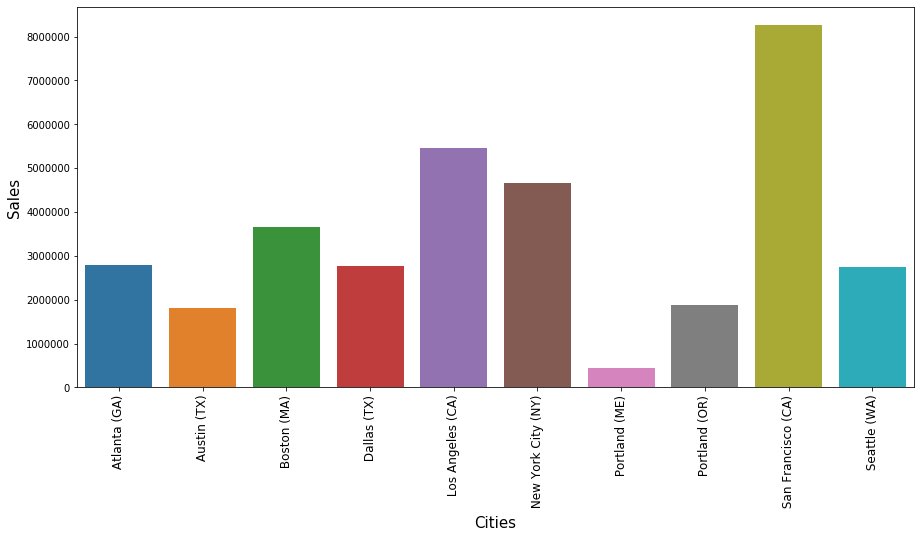

In [45]:
plt.figure(figsize=(15,7))
chart=sns.barplot(cities,results['Sales'],data=results)
chart.set_xticklabels(cities,fontsize=12,rotation=90)
chart.set_xlabel('Cities',fontsize=15)
chart.set_ylabel('Sales',fontsize=15)
plt.show()

## What time should we display advertisements to maximize the likelihood of customers buying product?

In [46]:
df.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  month Day   Time  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  19  08:46   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  07  22:30   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4  30  09:27   

    Sales               City  
0   23.90        Dallas (TX)  
2   99.99        Boston (MA)  
3  600.00   Los Angeles (CA)  
4   11.99   Los Angeles (CA)  
5   11.99   Los Angeles (CA)

In [47]:
df['Order Date'].str.split()[0][1]

'08:46'

In [48]:
df['time']=df['Order Date'].apply(lambda x:x.split()[1])

In [49]:
df.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  month Day   Time  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  19  08:46   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  07  22:30   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4  30  09:27   

    Sales               City   time  
0   23.90        Dallas (TX)  08:46  
2   99.99        Boston (MA)  22:30  
3  600.00   Los Angeles (CA)  14:38  
4   11.99   Los Angeles (CA)  14:38  
5   11.99   Los Angeles (CA)  09:27

In [50]:
df['time']=pd.to_datetime(df['time'])

In [51]:
df.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  month Day   Time  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  19  08:46   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  07  22:30   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4  30  09:27   

    Sales               City                time  
0   23.90        Dallas (TX) 2020-07-22 08:46:00  
2   99.99        Boston (MA) 2020-07-22 22:30:00  
3  600.00   Los Angeles (CA) 2020-07-22 14:38:00  
4   11.99   Los Angeles (CA) 2020-07-22 14:38:00  
5   11.99   Los Angeles (CA) 2020-07-22 09:27:00

In [52]:
df['hour']=df['time'].dt.hour

In [53]:
df.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  month Day   Time  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  19  08:46   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  07  22:30   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4  30  09:27   

    Sales               City                time  hour  
0   23.90        Dallas (TX) 2020-07-22 08:46:00     8  
2   99.99        Boston (MA) 2020-07-22 22:30:00    22  
3  600.00   Los Angeles (CA) 2020-07-22 14:38:00    14  
4   11.99   Los Angeles (CA) 2020-07-22 14:38:00    14  
5   11.99   Los Angeles (CA) 2020-07-22 09:27:00     9

In [54]:
Result=df.groupby('hour')['Order Date'].count()
Result

hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order Date, dtype: int64

In [55]:
hour=[x for x,y in df.groupby('hour')]
hour

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

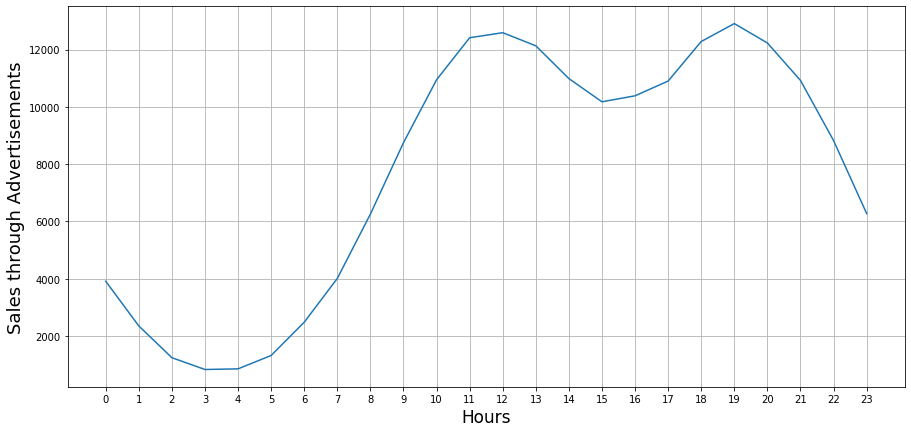

In [56]:
%matplotlib inline
plt.figure(figsize=(15,7))
chart=sns.lineplot(x=hour,y=Result,markers='&')
chart.set_xlabel("Hours",fontsize=17)
chart.set_ylabel('Sales through Advertisements',fontsize=18)
chart.set_xticks(range(0,24))
plt.grid()
plt.show()


## What products are more often sold together?

In [57]:
df

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
2        176559  Bose SoundSport Headphones                 1       99.99   
3        176560                Google Phone                 1      600.00   
4        176560            Wired Headphones                 1       11.99   
5        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186845   259353      AAA Batteries (4-pack)                 3        2.99   
186846   259354                      iPhone                 1      700.00   
186847   259355                      iPhone                 1      700.00   
186848   259356      34in Ultrawide Monitor                 1      379.99   
186849   259357        USB-C Charging Cable                 1       11.95   

            Order Date                         Purchase Address  month Day  \
0       04/19/19 08:46             917 1st St, Dallas, TX 75001      4  19   
2       04/07/19 22:30        682 Chestnut St, Boston, MA 02215      4  07   
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4  12   
4       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4  12   
5       04/30/19 09:27        333 8th St, Los Angeles, CA 90001      4  30   
...                ...                                      ...    ...  ..   
186845  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001      9  17   
186846  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016      9  01   
186847  09/23/19 07:39     220 12th St, San Francisco, CA 94016      9  23   
186848  09/19/19 17:30   511 Forest St, San Francisco, CA 94016      9  19   
186849  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016      9  30   

         Time   Sales                 City                time  hour  
0       08:46   23.90          Dallas (TX) 2020-07-22 08:46:00     8  
2       22:30   99.99          Boston (MA) 2020-07-22 22:30:00    22  
3       14:38  600.00     Los Angeles (CA) 2020-07-22 14:38:00    14  
4       14:38   11.99     Los Angeles (CA) 2020-07-22 14:38:00    14  
5       09:27   11.99     Los Angeles (CA) 2020-07-22 09:27:00     9  
...       ...     ...                  ...                 ...   ...  
186845  20:56    8.97     Los Angeles (CA) 2020-07-22 20:56:00    20  
186846  16:00  700.00   San Francisco (CA) 2020-07-22 16:00:00    16  
186847  07:39  700.00   San Francisco (CA) 2020-07-22 07:39:00     7  
186848  17:30  379.99   San Francisco (CA) 2020-07-22 17:30:00    17  
186849  00:18   11.95   San Francisco (CA) 2020-07-22 00:18:00     0  

[185950 rows x 13 columns]

In [58]:
df['Order ID'].value_counts()

160873    5
165665    4
226625    4
263918    4
242936    4
         ..
318004    1
228694    1
310542    1
251903    1
176506    1
Name: Order ID, Length: 178437, dtype: int64

In [59]:
df1=df[df['Order ID'].duplicated(keep=False)] #duplicated id


In [60]:
df1

Order ID                     Product  Quantity Ordered  Price Each  \
3        176560                Google Phone                 1      600.00   
4        176560            Wired Headphones                 1       11.99   
18       176574                Google Phone                 1      600.00   
19       176574        USB-C Charging Cable                 1       11.95   
30       176585  Bose SoundSport Headphones                 1       99.99   
...         ...                         ...               ...         ...   
186792   259303       AA Batteries (4-pack)                 1        3.84   
186803   259314            Wired Headphones                 1       11.99   
186804   259314      AAA Batteries (4-pack)                 2        2.99   
186841   259350                Google Phone                 1      600.00   
186842   259350        USB-C Charging Cable                 1       11.95   

            Order Date                       Purchase Address  month Day  \
3       04/12/19 14:38   669 Spruce St, Los Angeles, CA 90001      4  12   
4       04/12/19 14:38   669 Spruce St, Los Angeles, CA 90001      4  12   
18      04/03/19 19:42      20 Hill St, Los Angeles, CA 90001      4  03   
19      04/03/19 19:42      20 Hill St, Los Angeles, CA 90001      4  03   
30      04/07/19 11:31      823 Highland St, Boston, MA 02215      4  07   
...                ...                                    ...    ...  ..   
186792  09/20/19 20:18          106 7th St, Atlanta, GA 30301      9  20   
186803  09/16/19 00:25     241 Highland St, Atlanta, GA 30301      9  16   
186804  09/16/19 00:25     241 Highland St, Atlanta, GA 30301      9  16   
186841  09/30/19 13:49  519 Maple St, San Francisco, CA 94016      9  30   
186842  09/30/19 13:49  519 Maple St, San Francisco, CA 94016      9  30   

         Time   Sales                 City                time  hour  
3       14:38  600.00     Los Angeles (CA) 2020-07-22 14:38:00    14  
4       14:38   11.99     Los Angeles (CA) 2020-07-22 14:38:00    14  
18      19:42  600.00     Los Angeles (CA) 2020-07-22 19:42:00    19  
19      19:42   11.95     Los Angeles (CA) 2020-07-22 19:42:00    19  
30      11:31   99.99          Boston (MA) 2020-07-22 11:31:00    11  
...       ...     ...                  ...                 ...   ...  
186792  20:18    3.84         Atlanta (GA) 2020-07-22 20:18:00    20  
186803  00:25   11.99         Atlanta (GA) 2020-07-22 00:25:00     0  
186804  00:25    5.98         Atlanta (GA) 2020-07-22 00:25:00     0  
186841  13:49  600.00   San Francisco (CA) 2020-07-22 13:49:00    13  
186842  13:49   11.95   San Francisco (CA) 2020-07-22 13:49:00    13  

[14649 rows x 13 columns]

In [61]:
df1.groupby('Order ID')['Product']

In [62]:
for x,y in df1.groupby("Order ID")['Product']:
    print(y)

67588    USB-C Charging Cable
67589        Wired Headphones
Name: Product, dtype: object
67604    Apple Airpods Headphones
67605       AA Batteries (4-pack)
Name: Product, dtype: object
67680     Vareebadd Phone
67681    Wired Headphones
Name: Product, dtype: object
67700            Google Phone
67701    USB-C Charging Cable
Name: Product, dtype: object
67767                  Google Phone
67768    Bose SoundSport Headphones
Name: Product, dtype: object
67775                      iPhone
67776    Apple Airpods Headphones
Name: Product, dtype: object
67797                Google Phone
67798    Apple Airpods Headphones
Name: Product, dtype: object
67870                      iPhone
67871    Apple Airpods Headphones
67872            Wired Headphones
Name: Product, dtype: object
67909        USB-C Charging Cable
67910    Apple Airpods Headphones
Name: Product, dtype: object
67968    Lightning Charging Cable
67969            Wired Headphones
Name: Product, dtype: object
68062                   

Name: Product, dtype: object
70190                      iPhone
70191    Lightning Charging Cable
Name: Product, dtype: object
70205              iPhone
70206    Wired Headphones
Name: Product, dtype: object
70256    27in 4K Gaming Monitor
70257                    iPhone
Name: Product, dtype: object
70286              Wired Headphones
70287    Bose SoundSport Headphones
Name: Product, dtype: object
70313    Lightning Charging Cable
70314      AAA Batteries (4-pack)
Name: Product, dtype: object
70322              iPhone
70323    Wired Headphones
Name: Product, dtype: object
70327              iPhone
70328    Wired Headphones
Name: Product, dtype: object
70418            Google Phone
70419    USB-C Charging Cable
Name: Product, dtype: object
70446            Google Phone
70447    USB-C Charging Cable
Name: Product, dtype: object
70459              iPhone
70460    Wired Headphones
Name: Product, dtype: object
70498         Vareebadd Phone
70499    USB-C Charging Cable
Name: Product, dtype:

Name: Product, dtype: object
73868            Google Phone
73869    USB-C Charging Cable
Name: Product, dtype: object
73874      USB-C Charging Cable
73875    27in 4K Gaming Monitor
Name: Product, dtype: object
73894    AAA Batteries (4-pack)
73895      USB-C Charging Cable
Name: Product, dtype: object
73988              iPhone
73989    Wired Headphones
Name: Product, dtype: object
73991         Wired Headphones
73992    AA Batteries (4-pack)
Name: Product, dtype: object
73993        Google Phone
73994    Wired Headphones
Name: Product, dtype: object
74054                      iPhone
74055    Lightning Charging Cable
Name: Product, dtype: object
74070         Vareebadd Phone
74071    USB-C Charging Cable
Name: Product, dtype: object
74076         Vareebadd Phone
74077    USB-C Charging Cable
Name: Product, dtype: object
74084        Google Phone
74085    Wired Headphones
Name: Product, dtype: object
74097         Vareebadd Phone
74098    USB-C Charging Cable
Name: Product, dtype: objec

Name: Product, dtype: object
76629            Google Phone
76630    USB-C Charging Cable
Name: Product, dtype: object
76638                      iPhone
76639    Lightning Charging Cable
Name: Product, dtype: object
76643    USB-C Charging Cable
76644                  iPhone
Name: Product, dtype: object
76669                  iPhone
76670    USB-C Charging Cable
Name: Product, dtype: object
76675                  Google Phone
76676          USB-C Charging Cable
76677    Bose SoundSport Headphones
Name: Product, dtype: object
76696         Vareebadd Phone
76697    USB-C Charging Cable
Name: Product, dtype: object
76705    27in 4K Gaming Monitor
76706      USB-C Charging Cable
Name: Product, dtype: object
76729                      iPhone
76730    Lightning Charging Cable
Name: Product, dtype: object
76731        Google Phone
76732    Wired Headphones
Name: Product, dtype: object
76775    27in FHD Monitor
76776    Wired Headphones
Name: Product, dtype: object
76781            Google Phone

Name: Product, dtype: object
57149           ThinkPad Laptop
57150    AAA Batteries (4-pack)
Name: Product, dtype: object
57158                      iPhone
57159    Apple Airpods Headphones
Name: Product, dtype: object
57168                      iPhone
57169    Lightning Charging Cable
Name: Product, dtype: object
57212            Google Phone
57213    USB-C Charging Cable
Name: Product, dtype: object
57224              iPhone
57225    Wired Headphones
Name: Product, dtype: object
57287        USB-C Charging Cable
57288    Apple Airpods Headphones
Name: Product, dtype: object
57298    Apple Airpods Headphones
57299      AAA Batteries (4-pack)
Name: Product, dtype: object
57318    AAA Batteries (4-pack)
57319    27in 4K Gaming Monitor
Name: Product, dtype: object
57336      AAA Batteries (4-pack)
57337    Lightning Charging Cable
Name: Product, dtype: object
57388                      iPhone
57389    Lightning Charging Cable
57390    Apple Airpods Headphones
Name: Product, dtype: object

Name: Product, dtype: object
59893    AAA Batteries (4-pack)
59894    34in Ultrawide Monitor
Name: Product, dtype: object
59909    Bose SoundSport Headphones
59910      Lightning Charging Cable
Name: Product, dtype: object
59924            Google Phone
59925    USB-C Charging Cable
59926        Wired Headphones
Name: Product, dtype: object
59956    Lightning Charging Cable
59957    Lightning Charging Cable
Name: Product, dtype: object
59967    27in 4K Gaming Monitor
59968    27in 4K Gaming Monitor
Name: Product, dtype: object
60049       AA Batteries (4-pack)
60050    Apple Airpods Headphones
Name: Product, dtype: object
60061                  Google Phone
60062    Bose SoundSport Headphones
Name: Product, dtype: object
60086            Google Phone
60087    USB-C Charging Cable
Name: Product, dtype: object
60151              iPhone
60152    Wired Headphones
Name: Product, dtype: object
60170     AA Batteries (4-pack)
60171    34in Ultrawide Monitor
Name: Product, dtype: object
60217  

Name: Product, dtype: object
63217                      iPhone
63218    Lightning Charging Cable
Name: Product, dtype: object
63283    27in FHD Monitor
63284        20in Monitor
Name: Product, dtype: object
63335    Lightning Charging Cable
63336                Google Phone
Name: Product, dtype: object
63398    Lightning Charging Cable
63399            Wired Headphones
Name: Product, dtype: object
63463    AAA Batteries (4-pack)
63464          Wired Headphones
Name: Product, dtype: object
63480             20in Monitor
63481    AA Batteries (4-pack)
Name: Product, dtype: object
63486                  Google Phone
63487          USB-C Charging Cable
63488    Bose SoundSport Headphones
Name: Product, dtype: object
63523                      iPhone
63524    Apple Airpods Headphones
Name: Product, dtype: object
63564                 LG Dryer
63565    AA Batteries (4-pack)
Name: Product, dtype: object
63588            Google Phone
63589    USB-C Charging Cable
Name: Product, dtype: object
6

Name: Product, dtype: object
67259      AAA Batteries (4-pack)
67260    Lightning Charging Cable
Name: Product, dtype: object
67333                      iPhone
67334    Apple Airpods Headphones
Name: Product, dtype: object
67378     AA Batteries (4-pack)
67379    AAA Batteries (4-pack)
Name: Product, dtype: object
67390    Lightning Charging Cable
67391            Wired Headphones
Name: Product, dtype: object
67421          LG Washing Machine
67422    Lightning Charging Cable
Name: Product, dtype: object
67451              Google Phone
67452      USB-C Charging Cable
67453    AAA Batteries (4-pack)
Name: Product, dtype: object
67478      USB-C Charging Cable
67479    34in Ultrawide Monitor
Name: Product, dtype: object
67495         Vareebadd Phone
67496    USB-C Charging Cable
Name: Product, dtype: object
67508            Google Phone
67509    USB-C Charging Cable
Name: Product, dtype: object
67534            Google Phone
67535    USB-C Charging Cable
Name: Product, dtype: object
10526

Name: Product, dtype: object
108101      Apple Airpods Headphones
108102    Bose SoundSport Headphones
Name: Product, dtype: object
108105                  Google Phone
108106    Bose SoundSport Headphones
Name: Product, dtype: object
108110     AA Batteries (4-pack)
108111    AAA Batteries (4-pack)
Name: Product, dtype: object
108131            Google Phone
108132    USB-C Charging Cable
Name: Product, dtype: object
108145    34in Ultrawide Monitor
108146     AA Batteries (4-pack)
Name: Product, dtype: object
108151            Google Phone
108152    USB-C Charging Cable
Name: Product, dtype: object
108156            Google Phone
108157    USB-C Charging Cable
Name: Product, dtype: object
108168            Google Phone
108169    USB-C Charging Cable
Name: Product, dtype: object
108192            Google Phone
108193    USB-C Charging Cable
Name: Product, dtype: object
108204            Google Phone
108205    USB-C Charging Cable
Name: Product, dtype: object
108213              iPhone
10

Name: Product, dtype: object
110525                      iPhone
110526    Lightning Charging Cable
Name: Product, dtype: object
110584         AA Batteries (4-pack)
110585    Bose SoundSport Headphones
Name: Product, dtype: object
110626      Flatscreen TV
110627    ThinkPad Laptop
Name: Product, dtype: object
110662             Google Phone
110663    AA Batteries (4-pack)
Name: Product, dtype: object
110724    AA Batteries (4-pack)
110725                   iPhone
Name: Product, dtype: object
110727    AAA Batteries (4-pack)
110728           ThinkPad Laptop
Name: Product, dtype: object
110764            Google Phone
110765    USB-C Charging Cable
Name: Product, dtype: object
110768            Google Phone
110769    USB-C Charging Cable
110770        Wired Headphones
Name: Product, dtype: object
110784             iPhone
110785    ThinkPad Laptop
Name: Product, dtype: object
110794         Vareebadd Phone
110795    USB-C Charging Cable
Name: Product, dtype: object
110805              iP

Name: Product, dtype: object
113161            Google Phone
113162    USB-C Charging Cable
Name: Product, dtype: object
113175                      iPhone
113176    Apple Airpods Headphones
Name: Product, dtype: object
113212    Wired Headphones
113213    Wired Headphones
Name: Product, dtype: object
113256                  Google Phone
113257    Bose SoundSport Headphones
Name: Product, dtype: object
113273    Bose SoundSport Headphones
113274    Bose SoundSport Headphones
Name: Product, dtype: object
113281                  Google Phone
113282    Bose SoundSport Headphones
Name: Product, dtype: object
113284    Bose SoundSport Headphones
113285      Lightning Charging Cable
Name: Product, dtype: object
113298             ThinkPad Laptop
113299    Apple Airpods Headphones
Name: Product, dtype: object
113301            Google Phone
113302    USB-C Charging Cable
Name: Product, dtype: object
113306      AAA Batteries (4-pack)
113307    Lightning Charging Cable
Name: Product, dtype: obje

Name: Product, dtype: object
116405                      iPhone
116406    Lightning Charging Cable
Name: Product, dtype: object
116445     Vareebadd Phone
116446    Wired Headphones
Name: Product, dtype: object
116460                      iPhone
116461    Apple Airpods Headphones
Name: Product, dtype: object
116472                      iPhone
116473    Lightning Charging Cable
Name: Product, dtype: object
116482    34in Ultrawide Monitor
116483     AA Batteries (4-pack)
Name: Product, dtype: object
116540     USB-C Charging Cable
116541    AA Batteries (4-pack)
Name: Product, dtype: object
116547          Wired Headphones
116548    27in 4K Gaming Monitor
Name: Product, dtype: object
116560            Google Phone
116561    USB-C Charging Cable
Name: Product, dtype: object
116566         AA Batteries (4-pack)
116567    Bose SoundSport Headphones
Name: Product, dtype: object
116590    Apple Airpods Headphones
116591    Lightning Charging Cable
Name: Product, dtype: object
116610        G

Name: Product, dtype: object
119248    AA Batteries (4-pack)
119249       Macbook Pro Laptop
Name: Product, dtype: object
119250    Lightning Charging Cable
119251      AAA Batteries (4-pack)
Name: Product, dtype: object
119291                  Google Phone
119292          USB-C Charging Cable
119293    Bose SoundSport Headphones
Name: Product, dtype: object
119393         Vareebadd Phone
119394    USB-C Charging Cable
Name: Product, dtype: object
119398    AAA Batteries (4-pack)
119399      USB-C Charging Cable
Name: Product, dtype: object
119433        USB-C Charging Cable
119434    Lightning Charging Cable
Name: Product, dtype: object
119448            Google Phone
119449    USB-C Charging Cable
Name: Product, dtype: object
119482                  Google Phone
119483          USB-C Charging Cable
119484    Bose SoundSport Headphones
Name: Product, dtype: object
119566             ThinkPad Laptop
119567    Apple Airpods Headphones
Name: Product, dtype: object
119575            Google

Name: Product, dtype: object
2683                      iPhone
2684    Apple Airpods Headphones
Name: Product, dtype: object
2718            Google Phone
2719    USB-C Charging Cable
Name: Product, dtype: object
2783    34in Ultrawide Monitor
2784        Macbook Pro Laptop
Name: Product, dtype: object
2829                      iPhone
2830    Lightning Charging Cable
Name: Product, dtype: object
2871        Wired Headphones
2872    USB-C Charging Cable
Name: Product, dtype: object
2890         Wired Headphones
2891    AA Batteries (4-pack)
Name: Product, dtype: object
2904          Macbook Pro Laptop
2905    Apple Airpods Headphones
Name: Product, dtype: object
2922            Google Phone
2923    USB-C Charging Cable
Name: Product, dtype: object
2943     USB-C Charging Cable
2944    AA Batteries (4-pack)
Name: Product, dtype: object
2946                  Google Phone
2947    Bose SoundSport Headphones
Name: Product, dtype: object
3002    Macbook Pro Laptop
3003          20in Monitor
Nam

Name: Product, dtype: object
5071     AA Batteries (4-pack)
5072    AAA Batteries (4-pack)
Name: Product, dtype: object
5082         Vareebadd Phone
5083    USB-C Charging Cable
Name: Product, dtype: object
5090    Apple Airpods Headphones
5091      34in Ultrawide Monitor
Name: Product, dtype: object
5107    AAA Batteries (4-pack)
5108     AA Batteries (4-pack)
Name: Product, dtype: object
5149     Vareebadd Phone
5150    Wired Headphones
Name: Product, dtype: object
5189        Google Phone
5190    Wired Headphones
Name: Product, dtype: object
5232            Google Phone
5233    USB-C Charging Cable
Name: Product, dtype: object
5337        AAA Batteries (4-pack)
5338    Bose SoundSport Headphones
Name: Product, dtype: object
5375            Google Phone
5376    USB-C Charging Cable
Name: Product, dtype: object
5486                      iPhone
5487    Lightning Charging Cable
Name: Product, dtype: object
5499     Vareebadd Phone
5500    Wired Headphones
Name: Product, dtype: object
55

Name: Product, dtype: object
7371    AAA Batteries (4-pack)
7372    AAA Batteries (4-pack)
Name: Product, dtype: object
7407        Google Phone
7408    Wired Headphones
Name: Product, dtype: object
7427                      iPhone
7428    Lightning Charging Cable
Name: Product, dtype: object
7465       AA Batteries (4-pack)
7466    Lightning Charging Cable
Name: Product, dtype: object
7515                      iPhone
7516    Apple Airpods Headphones
Name: Product, dtype: object
7523              iPhone
7524    Wired Headphones
Name: Product, dtype: object
7623                  Google Phone
7624    Bose SoundSport Headphones
Name: Product, dtype: object
7662             Google Phone
7663    AA Batteries (4-pack)
Name: Product, dtype: object
7766             iPhone
7767    Vareebadd Phone
Name: Product, dtype: object
7817            Google Phone
7818    USB-C Charging Cable
Name: Product, dtype: object
7819            Google Phone
7820    USB-C Charging Cable
Name: Product, dtype: objec

10678        Google Phone
10679    Wired Headphones
Name: Product, dtype: object
10718    Apple Airpods Headphones
10719            Wired Headphones
Name: Product, dtype: object
10755    Apple Airpods Headphones
10756       AA Batteries (4-pack)
Name: Product, dtype: object
10757        Google Phone
10758    Wired Headphones
Name: Product, dtype: object
10761              iPhone
10762    Wired Headphones
Name: Product, dtype: object
10793    AAA Batteries (4-pack)
10794      USB-C Charging Cable
Name: Product, dtype: object
10805               ThinkPad Laptop
10806    Bose SoundSport Headphones
Name: Product, dtype: object
10812            Google Phone
10813    USB-C Charging Cable
Name: Product, dtype: object
10838            Google Phone
10839    USB-C Charging Cable
10840        Wired Headphones
Name: Product, dtype: object
10879            Google Phone
10880    USB-C Charging Cable
Name: Product, dtype: object
10894    AA Batteries (4-pack)
10895         Wired Headphones
Name: Prod

Name: Product, dtype: object
13313    Apple Airpods Headphones
13314            27in FHD Monitor
Name: Product, dtype: object
13317            Google Phone
13318    USB-C Charging Cable
Name: Product, dtype: object
13328        Google Phone
13329    Wired Headphones
Name: Product, dtype: object
13404                  Google Phone
13405    Bose SoundSport Headphones
Name: Product, dtype: object
13407    Apple Airpods Headphones
13408        USB-C Charging Cable
Name: Product, dtype: object
13435      USB-C Charging Cable
13436    AAA Batteries (4-pack)
Name: Product, dtype: object
13458    AA Batteries (4-pack)
13459     USB-C Charging Cable
Name: Product, dtype: object
13466    USB-C Charging Cable
13467        27in FHD Monitor
Name: Product, dtype: object
13487                      iPhone
13488    Lightning Charging Cable
13489    Apple Airpods Headphones
Name: Product, dtype: object
13532              iPhone
13533    Wired Headphones
Name: Product, dtype: object
13573             Thi

16179                      iPhone
16180    Lightning Charging Cable
Name: Product, dtype: object
16192       AA Batteries (4-pack)
16193    Lightning Charging Cable
Name: Product, dtype: object
16231                      iPhone
16232    Lightning Charging Cable
Name: Product, dtype: object
16272    AA Batteries (4-pack)
16273            Flatscreen TV
Name: Product, dtype: object
16335                20in Monitor
16336    Apple Airpods Headphones
Name: Product, dtype: object
16373    Bose SoundSport Headphones
16374        AAA Batteries (4-pack)
Name: Product, dtype: object
16385                      iPhone
16386    Lightning Charging Cable
Name: Product, dtype: object
16400      Apple Airpods Headphones
16401    Bose SoundSport Headphones
Name: Product, dtype: object
16411            Google Phone
16412    USB-C Charging Cable
Name: Product, dtype: object
16457              iPhone
16458    Wired Headphones
Name: Product, dtype: object
16547                      iPhone
16548    Apple Air

Name: Product, dtype: object
121378                      iPhone
121379    Lightning Charging Cable
Name: Product, dtype: object
121418       AA Batteries (4-pack)
121419    Apple Airpods Headphones
Name: Product, dtype: object
121450     Vareebadd Phone
121451    Wired Headphones
Name: Product, dtype: object
121468            27in FHD Monitor
121469    Lightning Charging Cable
Name: Product, dtype: object
121495    Wired Headphones
121496    Wired Headphones
Name: Product, dtype: object
121510    Wired Headphones
121511    27in FHD Monitor
Name: Product, dtype: object
121518                      iPhone
121519    Lightning Charging Cable
Name: Product, dtype: object
121550                      iPhone
121551    Lightning Charging Cable
121552    Apple Airpods Headphones
Name: Product, dtype: object
121559                      iPhone
121560    Lightning Charging Cable
Name: Product, dtype: object
121579    27in 4K Gaming Monitor
121580    AAA Batteries (4-pack)
Name: Product, dtype: objec

Name: Product, dtype: object
125672      AAA Batteries (4-pack)
125673    Apple Airpods Headphones
Name: Product, dtype: object
125674              iPhone
125675    Wired Headphones
Name: Product, dtype: object
125721            Google Phone
125722    USB-C Charging Cable
Name: Product, dtype: object
125869                      iPhone
125870    Lightning Charging Cable
Name: Product, dtype: object
125889             iPhone
125890    Vareebadd Phone
Name: Product, dtype: object
125936            Google Phone
125937    USB-C Charging Cable
Name: Product, dtype: object
125944                  Google Phone
125945          USB-C Charging Cable
125946    Bose SoundSport Headphones
Name: Product, dtype: object
125968    Bose SoundSport Headphones
125969      Lightning Charging Cable
Name: Product, dtype: object
125979                      iPhone
125980    Lightning Charging Cable
125981    Apple Airpods Headphones
Name: Product, dtype: object
125998         Vareebadd Phone
125999    USB-C Cha

Name: Product, dtype: object
128572            Google Phone
128573    USB-C Charging Cable
128574        Wired Headphones
Name: Product, dtype: object
128588    34in Ultrawide Monitor
128589                    iPhone
Name: Product, dtype: object
128592    Lightning Charging Cable
128593        USB-C Charging Cable
Name: Product, dtype: object
128599                      iPhone
128600    Lightning Charging Cable
Name: Product, dtype: object
128604         Vareebadd Phone
128605    USB-C Charging Cable
Name: Product, dtype: object
128720            Google Phone
128721    USB-C Charging Cable
Name: Product, dtype: object
128743    Apple Airpods Headphones
128744               Flatscreen TV
Name: Product, dtype: object
128753      AAA Batteries (4-pack)
128754    Lightning Charging Cable
Name: Product, dtype: object
128761    Apple Airpods Headphones
128762       AA Batteries (4-pack)
Name: Product, dtype: object
128769              iPhone
128770    Wired Headphones
Name: Product, dtype: o

Name: Product, dtype: object
131982    USB-C Charging Cable
131983    USB-C Charging Cable
Name: Product, dtype: object
132009                      iPhone
132010    Lightning Charging Cable
Name: Product, dtype: object
132033     USB-C Charging Cable
132034    AA Batteries (4-pack)
Name: Product, dtype: object
132109                      iPhone
132110    Lightning Charging Cable
Name: Product, dtype: object
132112        Google Phone
132113    Wired Headphones
Name: Product, dtype: object
132136          Macbook Pro Laptop
132137    Lightning Charging Cable
Name: Product, dtype: object
132164     Vareebadd Phone
132165    Wired Headphones
Name: Product, dtype: object
132215            Google Phone
132216    USB-C Charging Cable
Name: Product, dtype: object
132243            Google Phone
132244    USB-C Charging Cable
132245        Wired Headphones
Name: Product, dtype: object
132276                  Google Phone
132277          USB-C Charging Cable
132278    Bose SoundSport Headphones


Name: Product, dtype: object
135022                  iPhone
135023    USB-C Charging Cable
Name: Product, dtype: object
135035            Google Phone
135036    USB-C Charging Cable
135037        Wired Headphones
Name: Product, dtype: object
135046        Google Phone
135047    Wired Headphones
Name: Product, dtype: object
135100               Vareebadd Phone
135101          USB-C Charging Cable
135102    Bose SoundSport Headphones
Name: Product, dtype: object
135105              iPhone
135106    Wired Headphones
Name: Product, dtype: object
135182    AA Batteries (4-pack)
135183             Google Phone
Name: Product, dtype: object
135211                      iPhone
135212    Lightning Charging Cable
Name: Product, dtype: object
135282        Macbook Pro Laptop
135283    27in 4K Gaming Monitor
Name: Product, dtype: object
135290                      iPhone
135291    Lightning Charging Cable
Name: Product, dtype: object
135307     AA Batteries (4-pack)
135308    AAA Batteries (4-pack)


Name: Product, dtype: object
91670            Google Phone
91671    USB-C Charging Cable
Name: Product, dtype: object
91682     USB-C Charging Cable
91683    AA Batteries (4-pack)
Name: Product, dtype: object
91684                      iPhone
91685    Lightning Charging Cable
Name: Product, dtype: object
91788    Lightning Charging Cable
91789            27in FHD Monitor
Name: Product, dtype: object
91870    27in 4K Gaming Monitor
91871     AA Batteries (4-pack)
Name: Product, dtype: object
91875        20in Monitor
91876    Wired Headphones
Name: Product, dtype: object
91935            Google Phone
91936    USB-C Charging Cable
Name: Product, dtype: object
91983            Google Phone
91984    USB-C Charging Cable
Name: Product, dtype: object
92002         Vareebadd Phone
92003    USB-C Charging Cable
Name: Product, dtype: object
92006            27in FHD Monitor
92007    Apple Airpods Headphones
Name: Product, dtype: object
92018      AAA Batteries (4-pack)
92019    Apple Airpods He

Name: Product, dtype: object
94814        LG Washing Machine
94815    AAA Batteries (4-pack)
Name: Product, dtype: object
94839    Apple Airpods Headphones
94840            Wired Headphones
Name: Product, dtype: object
94841          Wired Headphones
94842    34in Ultrawide Monitor
Name: Product, dtype: object
94862                      iPhone
94863    Lightning Charging Cable
Name: Product, dtype: object
94916                      iPhone
94917    Lightning Charging Cable
Name: Product, dtype: object
94919    USB-C Charging Cable
94920    USB-C Charging Cable
Name: Product, dtype: object
94963            Google Phone
94964    USB-C Charging Cable
Name: Product, dtype: object
95024            Google Phone
95025    USB-C Charging Cable
95026        Wired Headphones
Name: Product, dtype: object
95047                      iPhone
95048    Apple Airpods Headphones
Name: Product, dtype: object
95064                      iPhone
95065    Lightning Charging Cable
Name: Product, dtype: object
950

Name: Product, dtype: object
97026                  Google Phone
97027    Bose SoundSport Headphones
Name: Product, dtype: object
97032                      iPhone
97033    Lightning Charging Cable
Name: Product, dtype: object
97082                      iPhone
97083    Lightning Charging Cable
Name: Product, dtype: object
97101        Google Phone
97102    Wired Headphones
Name: Product, dtype: object
97107            Google Phone
97108    USB-C Charging Cable
Name: Product, dtype: object
97130       AA Batteries (4-pack)
97131    Apple Airpods Headphones
Name: Product, dtype: object
97167            Wired Headphones
97168    Apple Airpods Headphones
Name: Product, dtype: object
97179                    iPhone
97180    34in Ultrawide Monitor
Name: Product, dtype: object
97192    USB-C Charging Cable
97193            Google Phone
Name: Product, dtype: object
97201        Google Phone
97202    Wired Headphones
Name: Product, dtype: object
97285                      iPhone
97286    Lightn

Name: Product, dtype: object
100198                      iPhone
100199    Lightning Charging Cable
Name: Product, dtype: object
100223            27in FHD Monitor
100224    Lightning Charging Cable
Name: Product, dtype: object
100227                      iPhone
100228    Lightning Charging Cable
100229            Wired Headphones
Name: Product, dtype: object
100236                      iPhone
100237    Apple Airpods Headphones
Name: Product, dtype: object
100275            Google Phone
100276    USB-C Charging Cable
Name: Product, dtype: object
100304                      iPhone
100305    Apple Airpods Headphones
Name: Product, dtype: object
100367    AA Batteries (4-pack)
100368          ThinkPad Laptop
Name: Product, dtype: object
100369                      iPhone
100370    Lightning Charging Cable
Name: Product, dtype: object
100399                      iPhone
100400    Lightning Charging Cable
Name: Product, dtype: object
100420                  Google Phone
100421    Bose SoundSp

Name: Product, dtype: object
102791    Bose SoundSport Headphones
102792      Lightning Charging Cable
Name: Product, dtype: object
102914              iPhone
102915    Wired Headphones
Name: Product, dtype: object
103001       AA Batteries (4-pack)
103002    Apple Airpods Headphones
Name: Product, dtype: object
103017        AAA Batteries (4-pack)
103018    Bose SoundSport Headphones
Name: Product, dtype: object
103031                  Google Phone
103032    Bose SoundSport Headphones
Name: Product, dtype: object
103035                      iPhone
103036    Lightning Charging Cable
Name: Product, dtype: object
103051        Google Phone
103052    Wired Headphones
Name: Product, dtype: object
103079              iPhone
103080    Wired Headphones
Name: Product, dtype: object
103083           ThinkPad Laptop
103084    AAA Batteries (4-pack)
Name: Product, dtype: object
103092    Apple Airpods Headphones
103093             Vareebadd Phone
Name: Product, dtype: object
103127    Lightning C

Name: Product, dtype: object
77696         Vareebadd Phone
77697    USB-C Charging Cable
Name: Product, dtype: object
77702          iPhone
77703    20in Monitor
Name: Product, dtype: object
77730                      iPhone
77731    Apple Airpods Headphones
Name: Product, dtype: object
77751    USB-C Charging Cable
77752      Macbook Pro Laptop
Name: Product, dtype: object
77843            Google Phone
77844    USB-C Charging Cable
Name: Product, dtype: object
77886          Wired Headphones
77887    AAA Batteries (4-pack)
Name: Product, dtype: object
77908      Apple Airpods Headphones
77909    Bose SoundSport Headphones
Name: Product, dtype: object
77916    Bose SoundSport Headphones
77917        AAA Batteries (4-pack)
Name: Product, dtype: object
77963            Google Phone
77964    USB-C Charging Cable
Name: Product, dtype: object
77965                      iPhone
77966    Lightning Charging Cable
Name: Product, dtype: object
77972    Lightning Charging Cable
77973              

Name: Product, dtype: object
81192         Vareebadd Phone
81193    USB-C Charging Cable
Name: Product, dtype: object
81201                      iPhone
81202    Lightning Charging Cable
Name: Product, dtype: object
81246      27in FHD Monitor
81247    Macbook Pro Laptop
Name: Product, dtype: object
81262         ThinkPad Laptop
81263    USB-C Charging Cable
Name: Product, dtype: object
81266       AA Batteries (4-pack)
81267    Apple Airpods Headphones
Name: Product, dtype: object
81304        27in FHD Monitor
81305    USB-C Charging Cable
Name: Product, dtype: object
81355            Google Phone
81356    USB-C Charging Cable
Name: Product, dtype: object
81407            Google Phone
81408    USB-C Charging Cable
Name: Product, dtype: object
81409    AAA Batteries (4-pack)
81410          Wired Headphones
Name: Product, dtype: object
81443                      iPhone
81444    Lightning Charging Cable
81445            Wired Headphones
Name: Product, dtype: object
81480            Google

Name: Product, dtype: object
83719                      iPhone
83720    Lightning Charging Cable
Name: Product, dtype: object
83739              iPhone
83740    Wired Headphones
Name: Product, dtype: object
83742            Google Phone
83743    USB-C Charging Cable
Name: Product, dtype: object
83757      Lightning Charging Cable
83758    Bose SoundSport Headphones
Name: Product, dtype: object
83823                  Google Phone
83824    Bose SoundSport Headphones
Name: Product, dtype: object
83827      27in 4K Gaming Monitor
83828    Lightning Charging Cable
Name: Product, dtype: object
83829    Wired Headphones
83830              iPhone
Name: Product, dtype: object
83934             Flatscreen TV
83935    34in Ultrawide Monitor
Name: Product, dtype: object
83936    Apple Airpods Headphones
83937    Lightning Charging Cable
Name: Product, dtype: object
83985    AAA Batteries (4-pack)
83986                    iPhone
Name: Product, dtype: object
84001         Vareebadd Phone
84002    US

Name: Product, dtype: object
87360    Apple Airpods Headphones
87361       AA Batteries (4-pack)
Name: Product, dtype: object
87485                      iPhone
87486    Lightning Charging Cable
Name: Product, dtype: object
87511    34in Ultrawide Monitor
87512    AAA Batteries (4-pack)
Name: Product, dtype: object
87534     AA Batteries (4-pack)
87535    AAA Batteries (4-pack)
Name: Product, dtype: object
87553                      iPhone
87554    Lightning Charging Cable
Name: Product, dtype: object
87557                  Google Phone
87558          USB-C Charging Cable
87559    Bose SoundSport Headphones
Name: Product, dtype: object
87564    Wired Headphones
87565              iPhone
Name: Product, dtype: object
87585                      iPhone
87586    Lightning Charging Cable
Name: Product, dtype: object
87593        USB-C Charging Cable
87594    Lightning Charging Cable
Name: Product, dtype: object
87597                      iPhone
87598    Lightning Charging Cable
Name: Product,

91438            Google Phone
91439    USB-C Charging Cable
Name: Product, dtype: object
91442    Lightning Charging Cable
91443          Macbook Pro Laptop
Name: Product, dtype: object
91466                      iPhone
91467    Lightning Charging Cable
Name: Product, dtype: object
91473        27in 4K Gaming Monitor
91474    Bose SoundSport Headphones
Name: Product, dtype: object
91497         Vareebadd Phone
91498    USB-C Charging Cable
Name: Product, dtype: object
91501                      iPhone
91502    Apple Airpods Headphones
Name: Product, dtype: object
91509           ThinkPad Laptop
91510    AAA Batteries (4-pack)
Name: Product, dtype: object
91541            Google Phone
91542    USB-C Charging Cable
Name: Product, dtype: object
91568    Lightning Charging Cable
91569                      iPhone
Name: Product, dtype: object
91583            Google Phone
91584    USB-C Charging Cable
Name: Product, dtype: object
91611      Wired Headphones
91612    Macbook Pro Laptop
Name: 

Name: Product, dtype: object
21582    Lightning Charging Cable
21583                      iPhone
Name: Product, dtype: object
21594                      iPhone
21595    Lightning Charging Cable
Name: Product, dtype: object
21726                      iPhone
21727    Lightning Charging Cable
Name: Product, dtype: object
21772                      iPhone
21773    Apple Airpods Headphones
Name: Product, dtype: object
21810                      iPhone
21811    Apple Airpods Headphones
Name: Product, dtype: object
21815            Google Phone
21816    USB-C Charging Cable
Name: Product, dtype: object
21875                      iPhone
21876    Lightning Charging Cable
Name: Product, dtype: object
21878      Macbook Pro Laptop
21879    USB-C Charging Cable
Name: Product, dtype: object
21917                      iPhone
21918    Lightning Charging Cable
Name: Product, dtype: object
21931    AAA Batteries (4-pack)
21932    AAA Batteries (4-pack)
Name: Product, dtype: object
21961    34in Ultrawi

24879              iPhone
24880    Wired Headphones
Name: Product, dtype: object
24918                      iPhone
24919    Lightning Charging Cable
24920    Apple Airpods Headphones
24921            Wired Headphones
Name: Product, dtype: object
24936             ThinkPad Laptop
24937    Apple Airpods Headphones
Name: Product, dtype: object
24938          27in FHD Monitor
24939    AAA Batteries (4-pack)
Name: Product, dtype: object
24947    Bose SoundSport Headphones
24948      Lightning Charging Cable
Name: Product, dtype: object
24951         27in FHD Monitor
24952    AA Batteries (4-pack)
Name: Product, dtype: object
25066            Wired Headphones
25067    Apple Airpods Headphones
Name: Product, dtype: object
25100                      iPhone
25101    Apple Airpods Headphones
Name: Product, dtype: object
25102       AA Batteries (4-pack)
25103    Lightning Charging Cable
Name: Product, dtype: object
25127    AA Batteries (4-pack)
25128             Google Phone
Name: Product, dtyp

Name: Product, dtype: object
28233                      iPhone
28234    Lightning Charging Cable
Name: Product, dtype: object
28237    USB-C Charging Cable
28238    USB-C Charging Cable
Name: Product, dtype: object
28274    Lightning Charging Cable
28275        USB-C Charging Cable
Name: Product, dtype: object
28301    34in Ultrawide Monitor
28302           ThinkPad Laptop
Name: Product, dtype: object
28313      USB-C Charging Cable
28314    AAA Batteries (4-pack)
Name: Product, dtype: object
28346                   iPhone
28347    AA Batteries (4-pack)
Name: Product, dtype: object
28398    AAA Batteries (4-pack)
28399      USB-C Charging Cable
Name: Product, dtype: object
28413        Wired Headphones
28414    USB-C Charging Cable
Name: Product, dtype: object
28427    Lightning Charging Cable
28428    Lightning Charging Cable
Name: Product, dtype: object
28439                  Google Phone
28440    Bose SoundSport Headphones
Name: Product, dtype: object
28592                      iPho

Name: Product, dtype: object
178321    Lightning Charging Cable
178322            Wired Headphones
Name: Product, dtype: object
178362    Wired Headphones
178363    Wired Headphones
Name: Product, dtype: object
178369            Google Phone
178370    USB-C Charging Cable
Name: Product, dtype: object
178384         Vareebadd Phone
178385    USB-C Charging Cable
Name: Product, dtype: object
178425               Vareebadd Phone
178426    Bose SoundSport Headphones
Name: Product, dtype: object
178443              iPhone
178444    Wired Headphones
Name: Product, dtype: object
178479            Wired Headphones
178480    Lightning Charging Cable
Name: Product, dtype: object
178498     Vareebadd Phone
178499    Wired Headphones
Name: Product, dtype: object
178552            Google Phone
178553    USB-C Charging Cable
Name: Product, dtype: object
178578    Lightning Charging Cable
178579          LG Washing Machine
Name: Product, dtype: object
178618    AA Batteries (4-pack)
178619          T

180909            Wired Headphones
180910    Apple Airpods Headphones
Name: Product, dtype: object
180956         Vareebadd Phone
180957    USB-C Charging Cable
Name: Product, dtype: object
180968            Google Phone
180969    USB-C Charging Cable
Name: Product, dtype: object
180971            Google Phone
180972    USB-C Charging Cable
Name: Product, dtype: object
181010       AA Batteries (4-pack)
181011    Lightning Charging Cable
Name: Product, dtype: object
181083          Wired Headphones
181084    27in 4K Gaming Monitor
Name: Product, dtype: object
181090            Google Phone
181091    USB-C Charging Cable
Name: Product, dtype: object
181101    Bose SoundSport Headphones
181102        AAA Batteries (4-pack)
Name: Product, dtype: object
181123    Apple Airpods Headphones
181124        USB-C Charging Cable
Name: Product, dtype: object
181154    Apple Airpods Headphones
181155                      iPhone
Name: Product, dtype: object
181162    27in 4K Gaming Monitor
181163   

Name: Product, dtype: object
183716                      iPhone
183717    Lightning Charging Cable
183718    Apple Airpods Headphones
Name: Product, dtype: object
183743            Google Phone
183744    USB-C Charging Cable
Name: Product, dtype: object
183818    34in Ultrawide Monitor
183819      USB-C Charging Cable
Name: Product, dtype: object
183867        Google Phone
183868    Wired Headphones
Name: Product, dtype: object
183927              iPhone
183928    Wired Headphones
Name: Product, dtype: object
183947                      iPhone
183948    Lightning Charging Cable
Name: Product, dtype: object
183957    Apple Airpods Headphones
183958    Apple Airpods Headphones
Name: Product, dtype: object
183961            Google Phone
183962    USB-C Charging Cable
Name: Product, dtype: object
183992                      iPhone
183993    Lightning Charging Cable
Name: Product, dtype: object
184038             20in Monitor
184039    AA Batteries (4-pack)
Name: Product, dtype: object
1840

Name: Product, dtype: object
186597              iPhone
186598    Wired Headphones
Name: Product, dtype: object
186599    AAA Batteries (4-pack)
186600     AA Batteries (4-pack)
Name: Product, dtype: object
186611              iPhone
186612    Wired Headphones
Name: Product, dtype: object
186684         Vareebadd Phone
186685    USB-C Charging Cable
Name: Product, dtype: object
186689    27in FHD Monitor
186690     ThinkPad Laptop
Name: Product, dtype: object
186753            Google Phone
186754    USB-C Charging Cable
Name: Product, dtype: object
186761              iPhone
186762    Wired Headphones
Name: Product, dtype: object
186781    Apple Airpods Headphones
186782    Apple Airpods Headphones
Name: Product, dtype: object
186783                      iPhone
186784    Lightning Charging Cable
186785    Lightning Charging Cable
Name: Product, dtype: object
186791    34in Ultrawide Monitor
186792     AA Batteries (4-pack)
Name: Product, dtype: object
186803          Wired Headphones
1

Name: Product, dtype: object
157384                      iPhone
157385    Apple Airpods Headphones
Name: Product, dtype: object
157389     AA Batteries (4-pack)
157390    AAA Batteries (4-pack)
Name: Product, dtype: object
157400               Vareebadd Phone
157401          USB-C Charging Cable
157402    Bose SoundSport Headphones
Name: Product, dtype: object
157409    AAA Batteries (4-pack)
157410          Wired Headphones
Name: Product, dtype: object
157425                  Google Phone
157426    Bose SoundSport Headphones
Name: Product, dtype: object
157440    Bose SoundSport Headphones
157441        AAA Batteries (4-pack)
Name: Product, dtype: object
157461    Apple Airpods Headphones
157462            Wired Headphones
Name: Product, dtype: object
157496    27in 4K Gaming Monitor
157497    34in Ultrawide Monitor
Name: Product, dtype: object
157524                      iPhone
157525    Lightning Charging Cable
Name: Product, dtype: object
157576            Google Phone
157577    US

Name: Product, dtype: object
159945                  20in Monitor
159946    Bose SoundSport Headphones
Name: Product, dtype: object
159972    AA Batteries (4-pack)
159973             Google Phone
Name: Product, dtype: object
159984      Wired Headphones
159985    Macbook Pro Laptop
Name: Product, dtype: object
160024    27in FHD Monitor
160025    27in FHD Monitor
Name: Product, dtype: object
160119    27in 4K Gaming Monitor
160120    AAA Batteries (4-pack)
Name: Product, dtype: object
160128    USB-C Charging Cable
160129                  iPhone
Name: Product, dtype: object
160133                  Google Phone
160134    Bose SoundSport Headphones
Name: Product, dtype: object
160171    AAA Batteries (4-pack)
160172          27in FHD Monitor
Name: Product, dtype: object
160194               Vareebadd Phone
160195    Bose SoundSport Headphones
Name: Product, dtype: object
160197    AAA Batteries (4-pack)
160198           ThinkPad Laptop
Name: Product, dtype: object
160207        Google Ph

Name: Product, dtype: object
163255         Vareebadd Phone
163256    USB-C Charging Cable
Name: Product, dtype: object
163257    Wired Headphones
163258     ThinkPad Laptop
Name: Product, dtype: object
163278         Vareebadd Phone
163279    USB-C Charging Cable
Name: Product, dtype: object
163327    Macbook Pro Laptop
163328      Wired Headphones
Name: Product, dtype: object
163334                      iPhone
163335    Lightning Charging Cable
Name: Product, dtype: object
163389    Lightning Charging Cable
163390               Flatscreen TV
Name: Product, dtype: object
163409        Google Phone
163410    Wired Headphones
Name: Product, dtype: object
163478                      iPhone
163479    Lightning Charging Cable
Name: Product, dtype: object
163497        Google Phone
163498    Wired Headphones
Name: Product, dtype: object
163527    Lightning Charging Cable
163528      27in 4K Gaming Monitor
Name: Product, dtype: object
163564        Google Phone
163565    Wired Headphones
Nam

Name: Product, dtype: object
166376     Vareebadd Phone
166377    Wired Headphones
Name: Product, dtype: object
166383                  Google Phone
166384    Bose SoundSport Headphones
Name: Product, dtype: object
166390      34in Ultrawide Monitor
166391    Lightning Charging Cable
Name: Product, dtype: object
166416                      iPhone
166417    Lightning Charging Cable
Name: Product, dtype: object
166424    AAA Batteries (4-pack)
166425           ThinkPad Laptop
Name: Product, dtype: object
166449         ThinkPad Laptop
166450    USB-C Charging Cable
Name: Product, dtype: object
166456        Google Phone
166457    Wired Headphones
Name: Product, dtype: object
166494            Google Phone
166495    USB-C Charging Cable
Name: Product, dtype: object
166507    34in Ultrawide Monitor
166508      USB-C Charging Cable
Name: Product, dtype: object
166519     Vareebadd Phone
166520    Wired Headphones
Name: Product, dtype: object
166543        Macbook Pro Laptop
166544    27in 4

Name: Product, dtype: object
169484         Vareebadd Phone
169485    USB-C Charging Cable
Name: Product, dtype: object
169507            Google Phone
169508    USB-C Charging Cable
Name: Product, dtype: object
169509    AAA Batteries (4-pack)
169510      USB-C Charging Cable
Name: Product, dtype: object
169535            Google Phone
169536    USB-C Charging Cable
Name: Product, dtype: object
169540                      iPhone
169541    Lightning Charging Cable
169542               Flatscreen TV
Name: Product, dtype: object
169547              iPhone
169548    Wired Headphones
Name: Product, dtype: object
169552              iPhone
169553    Wired Headphones
Name: Product, dtype: object
169566        Wired Headphones
169567    USB-C Charging Cable
Name: Product, dtype: object
169577        34in Ultrawide Monitor
169578    Bose SoundSport Headphones
Name: Product, dtype: object
169590          Wired Headphones
169591    AAA Batteries (4-pack)
Name: Product, dtype: object
169593        

Name: Product, dtype: object
172483    AAA Batteries (4-pack)
172484                  LG Dryer
Name: Product, dtype: object
172486    Bose SoundSport Headphones
172487        AAA Batteries (4-pack)
Name: Product, dtype: object
172496            Google Phone
172497    USB-C Charging Cable
Name: Product, dtype: object
172540         Vareebadd Phone
172541    USB-C Charging Cable
Name: Product, dtype: object
172581      Lightning Charging Cable
172582    Bose SoundSport Headphones
Name: Product, dtype: object
172607    AAA Batteries (4-pack)
172608          27in FHD Monitor
Name: Product, dtype: object
172644    AA Batteries (4-pack)
172645    AA Batteries (4-pack)
Name: Product, dtype: object
172680                  Google Phone
172681    Bose SoundSport Headphones
Name: Product, dtype: object
172731             Flatscreen TV
172732    34in Ultrawide Monitor
Name: Product, dtype: object
172736                  Google Phone
172737    Bose SoundSport Headphones
Name: Product, dtype: object

Name: Product, dtype: object
175069            Google Phone
175070    USB-C Charging Cable
Name: Product, dtype: object
175074    USB-C Charging Cable
175075        27in FHD Monitor
Name: Product, dtype: object
175083          USB-C Charging Cable
175084    Bose SoundSport Headphones
Name: Product, dtype: object
137133    Bose SoundSport Headphones
137134               ThinkPad Laptop
Name: Product, dtype: object
137139            Wired Headphones
137140    Apple Airpods Headphones
Name: Product, dtype: object
137148                      iPhone
137149    Apple Airpods Headphones
Name: Product, dtype: object
137163                      iPhone
137164    Lightning Charging Cable
Name: Product, dtype: object
137171    Bose SoundSport Headphones
137172              27in FHD Monitor
Name: Product, dtype: object
137189      USB-C Charging Cable
137190    AAA Batteries (4-pack)
Name: Product, dtype: object
137275    Apple Airpods Headphones
137276      AAA Batteries (4-pack)
Name: Product, dty

Name: Product, dtype: object
140143    USB-C Charging Cable
140144        Wired Headphones
Name: Product, dtype: object
140146                      iPhone
140147    Lightning Charging Cable
Name: Product, dtype: object
140155         Vareebadd Phone
140156    USB-C Charging Cable
Name: Product, dtype: object
140173                      iPhone
140174    Apple Airpods Headphones
Name: Product, dtype: object
140185            Google Phone
140186    USB-C Charging Cable
140187        Wired Headphones
Name: Product, dtype: object
140202         Wired Headphones
140203    AA Batteries (4-pack)
Name: Product, dtype: object
140311    27in FHD Monitor
140312    27in FHD Monitor
Name: Product, dtype: object
140348    USB-C Charging Cable
140349    USB-C Charging Cable
Name: Product, dtype: object
140425                      iPhone
140426    Lightning Charging Cable
Name: Product, dtype: object
140545              iPhone
140546    Wired Headphones
Name: Product, dtype: object
140556    AAA Batter

Name: Product, dtype: object
143771    Bose SoundSport Headphones
143772      Lightning Charging Cable
Name: Product, dtype: object
143872    Bose SoundSport Headphones
143873      Lightning Charging Cable
Name: Product, dtype: object
143927                      iPhone
143928    Lightning Charging Cable
Name: Product, dtype: object
144058    Lightning Charging Cable
144059       AA Batteries (4-pack)
Name: Product, dtype: object
144080    27in 4K Gaming Monitor
144081          Wired Headphones
Name: Product, dtype: object
144101    Lightning Charging Cable
144102             ThinkPad Laptop
Name: Product, dtype: object
144122                      iPhone
144123    Lightning Charging Cable
Name: Product, dtype: object
144128    Bose SoundSport Headphones
144129        AAA Batteries (4-pack)
Name: Product, dtype: object
144136            Google Phone
144137    USB-C Charging Cable
Name: Product, dtype: object
144153     USB-C Charging Cable
144154    AA Batteries (4-pack)
Name: Product, d

Name: Product, dtype: object
146498    Bose SoundSport Headphones
146499                        iPhone
Name: Product, dtype: object
146520              27in FHD Monitor
146521    Bose SoundSport Headphones
Name: Product, dtype: object
146536        Google Phone
146537    Wired Headphones
Name: Product, dtype: object
146613    AAA Batteries (4-pack)
146614          27in FHD Monitor
Name: Product, dtype: object
146646    Lightning Charging Cable
146647      AAA Batteries (4-pack)
Name: Product, dtype: object
146698         Vareebadd Phone
146699    USB-C Charging Cable
Name: Product, dtype: object
146705            Google Phone
146706    USB-C Charging Cable
Name: Product, dtype: object
146722    Apple Airpods Headphones
146723            Wired Headphones
Name: Product, dtype: object
146759                  Google Phone
146760    Bose SoundSport Headphones
Name: Product, dtype: object
146762    AAA Batteries (4-pack)
146763    27in 4K Gaming Monitor
Name: Product, dtype: object
146799   

Name: Product, dtype: object
149348                      iPhone
149349    Lightning Charging Cable
Name: Product, dtype: object
149449         Vareebadd Phone
149450    USB-C Charging Cable
Name: Product, dtype: object
149460         Vareebadd Phone
149461    USB-C Charging Cable
Name: Product, dtype: object
149466              iPhone
149467    Wired Headphones
Name: Product, dtype: object
149499    AA Batteries (4-pack)
149500         Wired Headphones
Name: Product, dtype: object
149576    Lightning Charging Cable
149577               Flatscreen TV
Name: Product, dtype: object
149578              iPhone
149579    27in FHD Monitor
Name: Product, dtype: object
149652            Google Phone
149653    USB-C Charging Cable
Name: Product, dtype: object
149661        Google Phone
149662    Wired Headphones
Name: Product, dtype: object
149682    AAA Batteries (4-pack)
149683           Vareebadd Phone
Name: Product, dtype: object
149701                  Google Phone
149702    Bose SoundSport 

Name: Product, dtype: object
152317    AA Batteries (4-pack)
152318         Wired Headphones
Name: Product, dtype: object
152340    AAA Batteries (4-pack)
152341              Google Phone
Name: Product, dtype: object
152357    USB-C Charging Cable
152358    USB-C Charging Cable
Name: Product, dtype: object
152363    Lightning Charging Cable
152364      27in 4K Gaming Monitor
Name: Product, dtype: object
152449      Lightning Charging Cable
152450    Bose SoundSport Headphones
Name: Product, dtype: object
152474        Google Phone
152475    Wired Headphones
Name: Product, dtype: object
152491                      iPhone
152492    Lightning Charging Cable
152493            Wired Headphones
Name: Product, dtype: object
152528    Apple Airpods Headphones
152529                Google Phone
Name: Product, dtype: object
152570    27in 4K Gaming Monitor
152571          Wired Headphones
Name: Product, dtype: object
152623             ThinkPad Laptop
152624    Apple Airpods Headphones
Name: Pro

Name: Product, dtype: object
30899                      iPhone
30900    Apple Airpods Headphones
Name: Product, dtype: object
30908        USB-C Charging Cable
30909    Lightning Charging Cable
Name: Product, dtype: object
30944            Google Phone
30945    USB-C Charging Cable
Name: Product, dtype: object
31021        Google Phone
31022    Wired Headphones
Name: Product, dtype: object
31026               Flatscreen TV
31027    Lightning Charging Cable
Name: Product, dtype: object
31036         Vareebadd Phone
31037    USB-C Charging Cable
Name: Product, dtype: object
31117                      iPhone
31118    Lightning Charging Cable
31119            Wired Headphones
31120       AA Batteries (4-pack)
Name: Product, dtype: object
31121         Vareebadd Phone
31122    USB-C Charging Cable
Name: Product, dtype: object
31158              iPhone
31159    Wired Headphones
Name: Product, dtype: object
31211            Google Phone
31212    USB-C Charging Cable
Name: Product, dtype: obje

Name: Product, dtype: object
34641            Google Phone
34642    USB-C Charging Cable
Name: Product, dtype: object
34658          Macbook Pro Laptop
34659    Apple Airpods Headphones
Name: Product, dtype: object
34685               Vareebadd Phone
34686    Bose SoundSport Headphones
Name: Product, dtype: object
34733               Vareebadd Phone
34734    Bose SoundSport Headphones
34735              Wired Headphones
Name: Product, dtype: object
34747    AAA Batteries (4-pack)
34748          27in FHD Monitor
Name: Product, dtype: object
34763              Google Phone
34764    AAA Batteries (4-pack)
Name: Product, dtype: object
34775                      iPhone
34776    Lightning Charging Cable
34777    Apple Airpods Headphones
Name: Product, dtype: object
34829        Google Phone
34830    Wired Headphones
Name: Product, dtype: object
34834            20in Monitor
34835    USB-C Charging Cable
Name: Product, dtype: object
34847         Vareebadd Phone
34848    USB-C Charging Cable


Name: Product, dtype: object
38066        USB-C Charging Cable
38067    Apple Airpods Headphones
Name: Product, dtype: object
38071         Vareebadd Phone
38072    USB-C Charging Cable
38073        Wired Headphones
Name: Product, dtype: object
38075            Google Phone
38076    USB-C Charging Cable
38077        Wired Headphones
Name: Product, dtype: object
38130     USB-C Charging Cable
38131    AA Batteries (4-pack)
Name: Product, dtype: object
38140                      iPhone
38141    Lightning Charging Cable
Name: Product, dtype: object
38159            Google Phone
38160    USB-C Charging Cable
Name: Product, dtype: object
38171            27in FHD Monitor
38172    Apple Airpods Headphones
Name: Product, dtype: object
38240                      iPhone
38241    Lightning Charging Cable
Name: Product, dtype: object
38248              iPhone
38249    Wired Headphones
Name: Product, dtype: object
38390       AA Batteries (4-pack)
38391    Apple Airpods Headphones
Name: Product, d

Name: Product, dtype: object
40762     Vareebadd Phone
40763    Wired Headphones
Name: Product, dtype: object
40765    AA Batteries (4-pack)
40766         Wired Headphones
Name: Product, dtype: object
40790        Google Phone
40791    Wired Headphones
Name: Product, dtype: object
40866       AA Batteries (4-pack)
40867    Lightning Charging Cable
Name: Product, dtype: object
40880              iPhone
40881    Wired Headphones
Name: Product, dtype: object
40910    27in FHD Monitor
40911    Wired Headphones
Name: Product, dtype: object
40918            Google Phone
40919    USB-C Charging Cable
Name: Product, dtype: object
40922            Google Phone
40923    USB-C Charging Cable
Name: Product, dtype: object
41001            Google Phone
41002    USB-C Charging Cable
Name: Product, dtype: object
41023    34in Ultrawide Monitor
41024    34in Ultrawide Monitor
Name: Product, dtype: object
41047              iPhone
41048    Wired Headphones
Name: Product, dtype: object
41083             

Name: Product, dtype: object
43708               Vareebadd Phone
43709    Bose SoundSport Headphones
Name: Product, dtype: object
43754    Bose SoundSport Headphones
43755               Vareebadd Phone
Name: Product, dtype: object
43768                      iPhone
43769    Lightning Charging Cable
Name: Product, dtype: object
43780        Wired Headphones
43781    USB-C Charging Cable
Name: Product, dtype: object
43793    USB-C Charging Cable
43794        Wired Headphones
Name: Product, dtype: object
43797          27in FHD Monitor
43798    AAA Batteries (4-pack)
Name: Product, dtype: object
43852    Apple Airpods Headphones
43853       AA Batteries (4-pack)
Name: Product, dtype: object
43892         Vareebadd Phone
43893    USB-C Charging Cable
Name: Product, dtype: object
43923              iPhone
43924    Wired Headphones
Name: Product, dtype: object
43939                      iPhone
43940    Lightning Charging Cable
Name: Product, dtype: object
43943    USB-C Charging Cable
43944  

Name: Product, dtype: object
47094    34in Ultrawide Monitor
47095     AA Batteries (4-pack)
Name: Product, dtype: object
47115        Google Phone
47116    Wired Headphones
Name: Product, dtype: object
47124          Wired Headphones
47125    AAA Batteries (4-pack)
Name: Product, dtype: object
47128    Apple Airpods Headphones
47129      27in 4K Gaming Monitor
Name: Product, dtype: object
47133            Google Phone
47134    USB-C Charging Cable
Name: Product, dtype: object
47166         Vareebadd Phone
47167    USB-C Charging Cable
Name: Product, dtype: object
47174         Vareebadd Phone
47175    USB-C Charging Cable
Name: Product, dtype: object
47187             Flatscreen TV
47188    AAA Batteries (4-pack)
Name: Product, dtype: object
47190    AA Batteries (4-pack)
47191                   iPhone
Name: Product, dtype: object
47201            Google Phone
47202    USB-C Charging Cable
47203        Wired Headphones
Name: Product, dtype: object
47221            Google Phone
47222  

Name: Product, dtype: object
50107         Vareebadd Phone
50108    USB-C Charging Cable
Name: Product, dtype: object
50181            Wired Headphones
50182    Apple Airpods Headphones
Name: Product, dtype: object
50207    Bose SoundSport Headphones
50208      Lightning Charging Cable
Name: Product, dtype: object
50216        Google Phone
50217    Wired Headphones
Name: Product, dtype: object
50220            Google Phone
50221    USB-C Charging Cable
Name: Product, dtype: object
50224    AA Batteries (4-pack)
50225    AA Batteries (4-pack)
Name: Product, dtype: object
50248            Flatscreen TV
50249    AA Batteries (4-pack)
Name: Product, dtype: object
50287    AA Batteries (4-pack)
50288    AA Batteries (4-pack)
Name: Product, dtype: object
50297        Google Phone
50298    Wired Headphones
Name: Product, dtype: object
50326    Bose SoundSport Headphones
50327         AA Batteries (4-pack)
Name: Product, dtype: object
50332    Wired Headphones
50333        Google Phone
Name: P

Name: Product, dtype: object
53045            Google Phone
53046    USB-C Charging Cable
Name: Product, dtype: object
53064              iPhone
53065    Wired Headphones
Name: Product, dtype: object
53073         Vareebadd Phone
53074    USB-C Charging Cable
Name: Product, dtype: object
53096            Google Phone
53097    USB-C Charging Cable
Name: Product, dtype: object
53137              iPhone
53138    Wired Headphones
Name: Product, dtype: object
53175                      iPhone
53176    Apple Airpods Headphones
Name: Product, dtype: object
53190         Vareebadd Phone
53191    USB-C Charging Cable
53192        Wired Headphones
Name: Product, dtype: object
53205                      iPhone
53206    Lightning Charging Cable
Name: Product, dtype: object
53257         Vareebadd Phone
53258    USB-C Charging Cable
Name: Product, dtype: object
53268              iPhone
53269    Wired Headphones
Name: Product, dtype: object
53284              iPhone
53285    Wired Headphones
Name: P

In [63]:
df1['Joined']=df1.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

In [64]:
df1

Order ID                     Product  Quantity Ordered  Price Each  \
3        176560                Google Phone                 1      600.00   
4        176560            Wired Headphones                 1       11.99   
18       176574                Google Phone                 1      600.00   
19       176574        USB-C Charging Cable                 1       11.95   
30       176585  Bose SoundSport Headphones                 1       99.99   
...         ...                         ...               ...         ...   
186792   259303       AA Batteries (4-pack)                 1        3.84   
186803   259314            Wired Headphones                 1       11.99   
186804   259314      AAA Batteries (4-pack)                 2        2.99   
186841   259350                Google Phone                 1      600.00   
186842   259350        USB-C Charging Cable                 1       11.95   

            Order Date                       Purchase Address  month Day  \
3       04/12/19 14:38   669 Spruce St, Los Angeles, CA 90001      4  12   
4       04/12/19 14:38   669 Spruce St, Los Angeles, CA 90001      4  12   
18      04/03/19 19:42      20 Hill St, Los Angeles, CA 90001      4  03   
19      04/03/19 19:42      20 Hill St, Los Angeles, CA 90001      4  03   
30      04/07/19 11:31      823 Highland St, Boston, MA 02215      4  07   
...                ...                                    ...    ...  ..   
186792  09/20/19 20:18          106 7th St, Atlanta, GA 30301      9  20   
186803  09/16/19 00:25     241 Highland St, Atlanta, GA 30301      9  16   
186804  09/16/19 00:25     241 Highland St, Atlanta, GA 30301      9  16   
186841  09/30/19 13:49  519 Maple St, San Francisco, CA 94016      9  30   
186842  09/30/19 13:49  519 Maple St, San Francisco, CA 94016      9  30   

         Time   Sales                 City                time  hour  \
3       14:38  600.00     Los Angeles (CA) 2020-07-22 14:38:00    14   
4       14:38   11.99     Los Angeles (CA) 2020-07-22 14:38:00    14   
18      19:42  600.00     Los Angeles (CA) 2020-07-22 19:42:00    19   
19      19:42   11.95     Los Angeles (CA) 2020-07-22 19:42:00    19   
30      11:31   99.99          Boston (MA) 2020-07-22 11:31:00    11   
...       ...     ...                  ...                 ...   ...   
186792  20:18    3.84         Atlanta (GA) 2020-07-22 20:18:00    20   
186803  00:25   11.99         Atlanta (GA) 2020-07-22 00:25:00     0   
186804  00:25    5.98         Atlanta (GA) 2020-07-22 00:25:00     0   
186841  13:49  600.00   San Francisco (CA) 2020-07-22 13:49:00    13   
186842  13:49   11.95   San Francisco (CA) 2020-07-22 13:49:00    13   

                                                   Joined  
3                           Google Phone,Wired Headphones  
4                           Google Phone,Wired Headphones  
18                      Google Phone,USB-C Charging Cable  
19                      Google Phone,USB-C Charging Cable  
30      Bose SoundSport Headphones,Bose SoundSport Hea...  
...                                                   ...  
186792       34in Ultrawide Monitor,AA Batteries (4-pack)  
186803            Wired Headphones,AAA Batteries (4-pack)  
186804            Wired Headphones,AAA Batteries (4-pack)  
186841                  Google Phone,USB-C Charging Cable  
186842                  Google Phone,USB-C Charging Cable  

[14649 rows x 14 columns]

In [65]:
df1.drop_duplicates(subset='Order ID',inplace=True)

In [66]:
df1.head()

Order ID                     Product  Quantity Ordered  Price Each  \
3     176560                Google Phone                 1      600.00   
18    176574                Google Phone                 1      600.00   
30    176585  Bose SoundSport Headphones                 1       99.99   
32    176586      AAA Batteries (4-pack)                 2        2.99   
119   176672    Lightning Charging Cable                 1       14.95   

         Order Date                        Purchase Address  month Day   Time  \
3    04/12/19 14:38    669 Spruce St, Los Angeles, CA 90001      4  12  14:38   
18   04/03/19 19:42       20 Hill St, Los Angeles, CA 90001      4  03  19:42   
30   04/07/19 11:31       823 Highland St, Boston, MA 02215      4  07  11:31   
32   04/10/19 17:00  365 Center St, San Francisco, CA 94016      4  10  17:00   
119  04/12/19 11:07   778 Maple St, New York City, NY 10001      4  12  11:07   

      Sales                 City                time  hour  \
3    600.00     Los Angeles (CA) 2020-07-22 14:38:00    14   
18   600.00     Los Angeles (CA) 2020-07-22 19:42:00    19   
30    99.99          Boston (MA) 2020-07-22 11:31:00    11   
32     5.98   San Francisco (CA) 2020-07-22 17:00:00    17   
119   14.95   New York City (NY) 2020-07-22 11:07:00    11   

                                                Joined  
3                        Google Phone,Wired Headphones  
18                   Google Phone,USB-C Charging Cable  
30   Bose SoundSport Headphones,Bose SoundSport Hea...  
32                 AAA Batteries (4-pack),Google Phone  
119      Lightning Charging Cable,USB-C Charging Cable

In [67]:
for data in df1['Joined']:
    print(data)

Google Phone,Wired Headphones
Google Phone,USB-C Charging Cable
Bose SoundSport Headphones,Bose SoundSport Headphones
AAA Batteries (4-pack),Google Phone
Lightning Charging Cable,USB-C Charging Cable
Apple Airpods Headphones,ThinkPad Laptop
Bose SoundSport Headphones,AAA Batteries (4-pack)
34in Ultrawide Monitor,Google Phone
Lightning Charging Cable,USB-C Charging Cable
iPhone,Lightning Charging Cable
Google Phone,Bose SoundSport Headphones,Wired Headphones
Google Phone,USB-C Charging Cable
Google Phone,Wired Headphones
Google Phone,Wired Headphones
AAA Batteries (4-pack),27in FHD Monitor
USB-C Charging Cable,AAA Batteries (4-pack)
Google Phone,USB-C Charging Cable
iPhone,Wired Headphones
iPhone,Wired Headphones
iPhone,27in 4K Gaming Monitor
iPhone,Lightning Charging Cable
ThinkPad Laptop,AAA Batteries (4-pack)
iPhone,Apple Airpods Headphones,AAA Batteries (4-pack)
iPhone,Lightning Charging Cable
Wired Headphones,Apple Airpods Headphones
Macbook Pro Laptop,ThinkPad Laptop
AA Batteries 

Wired Headphones,34in Ultrawide Monitor
Google Phone,Wired Headphones
Google Phone,USB-C Charging Cable
Google Phone,USB-C Charging Cable
Vareebadd Phone,Wired Headphones
iPhone,Wired Headphones
AAA Batteries (4-pack),20in Monitor
AA Batteries (4-pack),AA Batteries (4-pack)
Apple Airpods Headphones,USB-C Charging Cable
iPhone,Apple Airpods Headphones
Lightning Charging Cable,iPhone
iPhone,Lightning Charging Cable
iPhone,Lightning Charging Cable
iPhone,Apple Airpods Headphones
iPhone,Apple Airpods Headphones
Google Phone,USB-C Charging Cable
iPhone,Lightning Charging Cable
Macbook Pro Laptop,USB-C Charging Cable
iPhone,Lightning Charging Cable
AAA Batteries (4-pack),AAA Batteries (4-pack)
34in Ultrawide Monitor,AA Batteries (4-pack)
AAA Batteries (4-pack),Wired Headphones
iPhone,Lightning Charging Cable
Vareebadd Phone,Bose SoundSport Headphones
USB-C Charging Cable,Wired Headphones
Vareebadd Phone,USB-C Charging Cable
Vareebadd Phone,USB-C Charging Cable
iPhone,Apple Airpods Headphones

Google Phone,USB-C Charging Cable
Lightning Charging Cable,Lightning Charging Cable
Lightning Charging Cable,27in 4K Gaming Monitor
27in 4K Gaming Monitor,Google Phone
AAA Batteries (4-pack),27in FHD Monitor
USB-C Charging Cable,Apple Airpods Headphones
Vareebadd Phone,USB-C Charging Cable,Wired Headphones
Google Phone,USB-C Charging Cable,Wired Headphones
USB-C Charging Cable,AA Batteries (4-pack)
iPhone,Lightning Charging Cable
Google Phone,USB-C Charging Cable
27in FHD Monitor,Apple Airpods Headphones
iPhone,Lightning Charging Cable
iPhone,Wired Headphones
AA Batteries (4-pack),Apple Airpods Headphones
Google Phone,USB-C Charging Cable
Wired Headphones,Lightning Charging Cable
USB-C Charging Cable,Lightning Charging Cable
iPhone,Wired Headphones
Apple Airpods Headphones,Google Phone
iPhone,Lightning Charging Cable
Google Phone,Bose SoundSport Headphones
Google Phone,Wired Headphones
20in Monitor,Bose SoundSport Headphones
USB-C Charging Cable,ThinkPad Laptop
iPhone,Lightning Chargin

iPhone,Apple Airpods Headphones
iPhone,Lightning Charging Cable
Google Phone,Wired Headphones
Bose SoundSport Headphones,27in FHD Monitor
iPhone,Apple Airpods Headphones
Google Phone,USB-C Charging Cable
Google Phone,USB-C Charging Cable
Wired Headphones,27in 4K Gaming Monitor
Google Phone,USB-C Charging Cable
Apple Airpods Headphones,Lightning Charging Cable
Google Phone,USB-C Charging Cable
Google Phone,USB-C Charging Cable
AAA Batteries (4-pack),34in Ultrawide Monitor
Bose SoundSport Headphones,Lightning Charging Cable
Google Phone,USB-C Charging Cable,Wired Headphones
Lightning Charging Cable,Lightning Charging Cable
27in 4K Gaming Monitor,27in 4K Gaming Monitor
AA Batteries (4-pack),Apple Airpods Headphones
Google Phone,Bose SoundSport Headphones
Google Phone,USB-C Charging Cable
iPhone,Wired Headphones
AA Batteries (4-pack),34in Ultrawide Monitor
Google Phone,USB-C Charging Cable,Bose SoundSport Headphones
Lightning Charging Cable,Lightning Charging Cable
Google Phone,Bose SoundS

27in FHD Monitor,AAA Batteries (4-pack)
Wired Headphones,Lightning Charging Cable
iPhone,Apple Airpods Headphones
iPhone,Wired Headphones
iPhone,Lightning Charging Cable
Google Phone,Wired Headphones
Google Phone,Wired Headphones
Wired Headphones,Apple Airpods Headphones
Lightning Charging Cable,AA Batteries (4-pack)
Lightning Charging Cable,Google Phone
Google Phone,USB-C Charging Cable
USB-C Charging Cable,20in Monitor
Google Phone,USB-C Charging Cable
Google Phone,USB-C Charging Cable
USB-C Charging Cable,27in 4K Gaming Monitor
AAA Batteries (4-pack),USB-C Charging Cable
iPhone,Wired Headphones
Wired Headphones,AA Batteries (4-pack)
Google Phone,Wired Headphones
iPhone,Lightning Charging Cable
Vareebadd Phone,USB-C Charging Cable
Vareebadd Phone,USB-C Charging Cable
Google Phone,Wired Headphones
Vareebadd Phone,USB-C Charging Cable
iPhone,Lightning Charging Cable
AAA Batteries (4-pack),27in FHD Monitor
Google Phone,USB-C Charging Cable,Wired Headphones
Apple Airpods Headphones,Flats

Vareebadd Phone,USB-C Charging Cable
iPhone,Lightning Charging Cable
Google Phone,USB-C Charging Cable
iPhone,Wired Headphones
iPhone,Lightning Charging Cable
ThinkPad Laptop,Lightning Charging Cable
Macbook Pro Laptop,Apple Airpods Headphones
Google Phone,USB-C Charging Cable
Google Phone,USB-C Charging Cable,Wired Headphones
iPhone,Lightning Charging Cable,Wired Headphones
AAA Batteries (4-pack),AAA Batteries (4-pack)
iPhone,Lightning Charging Cable
iPhone,Lightning Charging Cable,Wired Headphones
iPhone,Apple Airpods Headphones
Google Phone,Wired Headphones
Apple Airpods Headphones,Bose SoundSport Headphones
iPhone,Wired Headphones
Vareebadd Phone,USB-C Charging Cable
iPhone,Lightning Charging Cable
Lightning Charging Cable,Macbook Pro Laptop
Bose SoundSport Headphones,Wired Headphones
Google Phone,Wired Headphones
27in 4K Gaming Monitor,AAA Batteries (4-pack)
iPhone,Lightning Charging Cable
AAA Batteries (4-pack),Wired Headphones
iPhone,Lightning Charging Cable,34in Ultrawide Monit

USB-C Charging Cable,Bose SoundSport Headphones
AA Batteries (4-pack),AAA Batteries (4-pack)
iPhone,Wired Headphones
Vareebadd Phone,USB-C Charging Cable
Google Phone,Bose SoundSport Headphones
Google Phone,AAA Batteries (4-pack)
20in Monitor,USB-C Charging Cable
Google Phone,USB-C Charging Cable
34in Ultrawide Monitor,Lightning Charging Cable
Google Phone,USB-C Charging Cable
Apple Airpods Headphones,Lightning Charging Cable
Wired Headphones,iPhone
Google Phone,USB-C Charging Cable
iPhone,Lightning Charging Cable
iPhone,Lightning Charging Cable
Bose SoundSport Headphones,Macbook Pro Laptop
20in Monitor,Flatscreen TV
iPhone,Wired Headphones
AA Batteries (4-pack),20in Monitor
Wired Headphones,27in FHD Monitor
AAA Batteries (4-pack),Apple Airpods Headphones
Vareebadd Phone,USB-C Charging Cable
Google Phone,Wired Headphones
Bose SoundSport Headphones,Flatscreen TV
iPhone,Apple Airpods Headphones
AAA Batteries (4-pack),AAA Batteries (4-pack)
iPhone,Wired Headphones
Google Phone,USB-C Charg

iPhone,Apple Airpods Headphones
Google Phone,USB-C Charging Cable
Google Phone,Wired Headphones
iPhone,Lightning Charging Cable
Macbook Pro Laptop,Lightning Charging Cable
iPhone,Wired Headphones
Lightning Charging Cable,USB-C Charging Cable
iPhone,27in 4K Gaming Monitor
Bose SoundSport Headphones,Vareebadd Phone
Google Phone,USB-C Charging Cable
iPhone,Apple Airpods Headphones
Google Phone,USB-C Charging Cable
iPhone,Apple Airpods Headphones
Google Phone,USB-C Charging Cable
AA Batteries (4-pack),27in 4K Gaming Monitor
iPhone,Lightning Charging Cable,Apple Airpods Headphones
iPhone,Lightning Charging Cable
Google Phone,Bose SoundSport Headphones,Wired Headphones
USB-C Charging Cable,AAA Batteries (4-pack)
Vareebadd Phone,USB-C Charging Cable
Lightning Charging Cable,Apple Airpods Headphones
AAA Batteries (4-pack),AA Batteries (4-pack)
Google Phone,Wired Headphones
Google Phone,USB-C Charging Cable,AAA Batteries (4-pack)
Wired Headphones,Flatscreen TV
Bose SoundSport Headphones,27in 4K

Google Phone,USB-C Charging Cable
iPhone,Lightning Charging Cable
iPhone,Apple Airpods Headphones
Lightning Charging Cable,Apple Airpods Headphones
Wired Headphones,Apple Airpods Headphones
iPhone,Lightning Charging Cable
USB-C Charging Cable,Apple Airpods Headphones
Wired Headphones,Lightning Charging Cable
Google Phone,Wired Headphones
Vareebadd Phone,USB-C Charging Cable
Vareebadd Phone,Wired Headphones
Google Phone,USB-C Charging Cable
iPhone,Lightning Charging Cable,Wired Headphones
Apple Airpods Headphones,Wired Headphones
Wired Headphones,Wired Headphones
iPhone,Lightning Charging Cable
AAA Batteries (4-pack),Lightning Charging Cable
AA Batteries (4-pack),Apple Airpods Headphones
iPhone,Apple Airpods Headphones
USB-C Charging Cable,USB-C Charging Cable
Vareebadd Phone,USB-C Charging Cable
Lightning Charging Cable,Wired Headphones
Macbook Pro Laptop,USB-C Charging Cable
Google Phone,USB-C Charging Cable
Google Phone,USB-C Charging Cable
iPhone,Wired Headphones
iPhone,Lightning Ch

In [68]:
###https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary 
#Referenced by above link.
from itertools import combinations
from collections import Counter
count=Counter()
for data in df1['Joined']:
    join=data.split(',')
    count.update(Counter(combinations(join,2)))
print(count)
    

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [69]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

## What product sold the most and why it sold the most?

In [70]:
df.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  month Day   Time  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  19  08:46   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  07  22:30   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4  30  09:27   

    Sales               City                time  hour  
0   23.90        Dallas (TX) 2020-07-22 08:46:00     8  
2   99.99        Boston (MA) 2020-07-22 22:30:00    22  
3  600.00   Los Angeles (CA) 2020-07-22 14:38:00    14  
4   11.99   Los Angeles (CA) 2020-07-22 14:38:00    14  
5   11.99   Los Angeles (CA) 2020-07-22 09:27:00     9

In [71]:
result=df.groupby('Product').sum()
result['Quantity Ordered']

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [72]:
product=[x for x,y in df.groupby('Product')]
product


['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

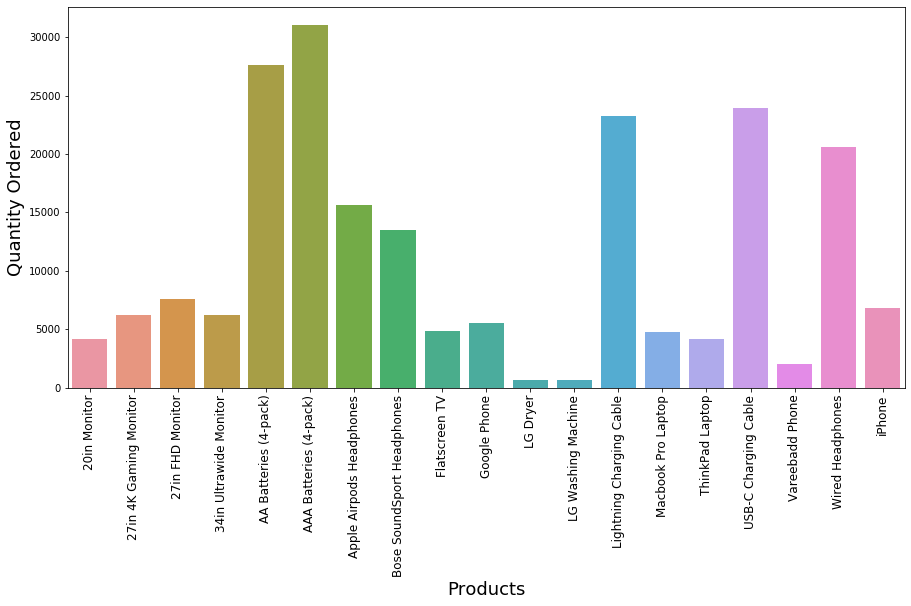

In [73]:
plt.figure(figsize=(15,7))
chart=sns.barplot(x=product,y=result['Quantity Ordered'])
chart.set_xticklabels(product,rotation=90,fontsize=12)
chart.set_xlabel('Products',fontsize=18)
chart.set_ylabel('Quantity Ordered',fontsize=18)
plt.show()

## Which Product  has more sales in which month?

In [74]:
df.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  month Day   Time  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  19  08:46   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  07  22:30   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  12  14:38   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4  30  09:27   

    Sales               City                time  hour  
0   23.90        Dallas (TX) 2020-07-22 08:46:00     8  
2   99.99        Boston (MA) 2020-07-22 22:30:00    22  
3  600.00   Los Angeles (CA) 2020-07-22 14:38:00    14  
4   11.99   Los Angeles (CA) 2020-07-22 14:38:00    14  
5   11.99   Los Angeles (CA) 2020-07-22 09:27:00     9

In [75]:
df.groupby('Product').sum()['Sales']

Product
20in Monitor                   454148.71
27in 4K Gaming Monitor        2435097.56
27in FHD Monitor              1132424.50
34in Ultrawide Monitor        2355558.01
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Apple Airpods Headphones      2349150.00
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Google Phone                  3319200.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       347094.15
Macbook Pro Laptop            8037600.00
ThinkPad Laptop               4129958.70
USB-C Charging Cable           286501.25
Vareebadd Phone                827200.00
Wired Headphones               246478.43
iPhone                        4794300.00
Name: Sales, dtype: float64

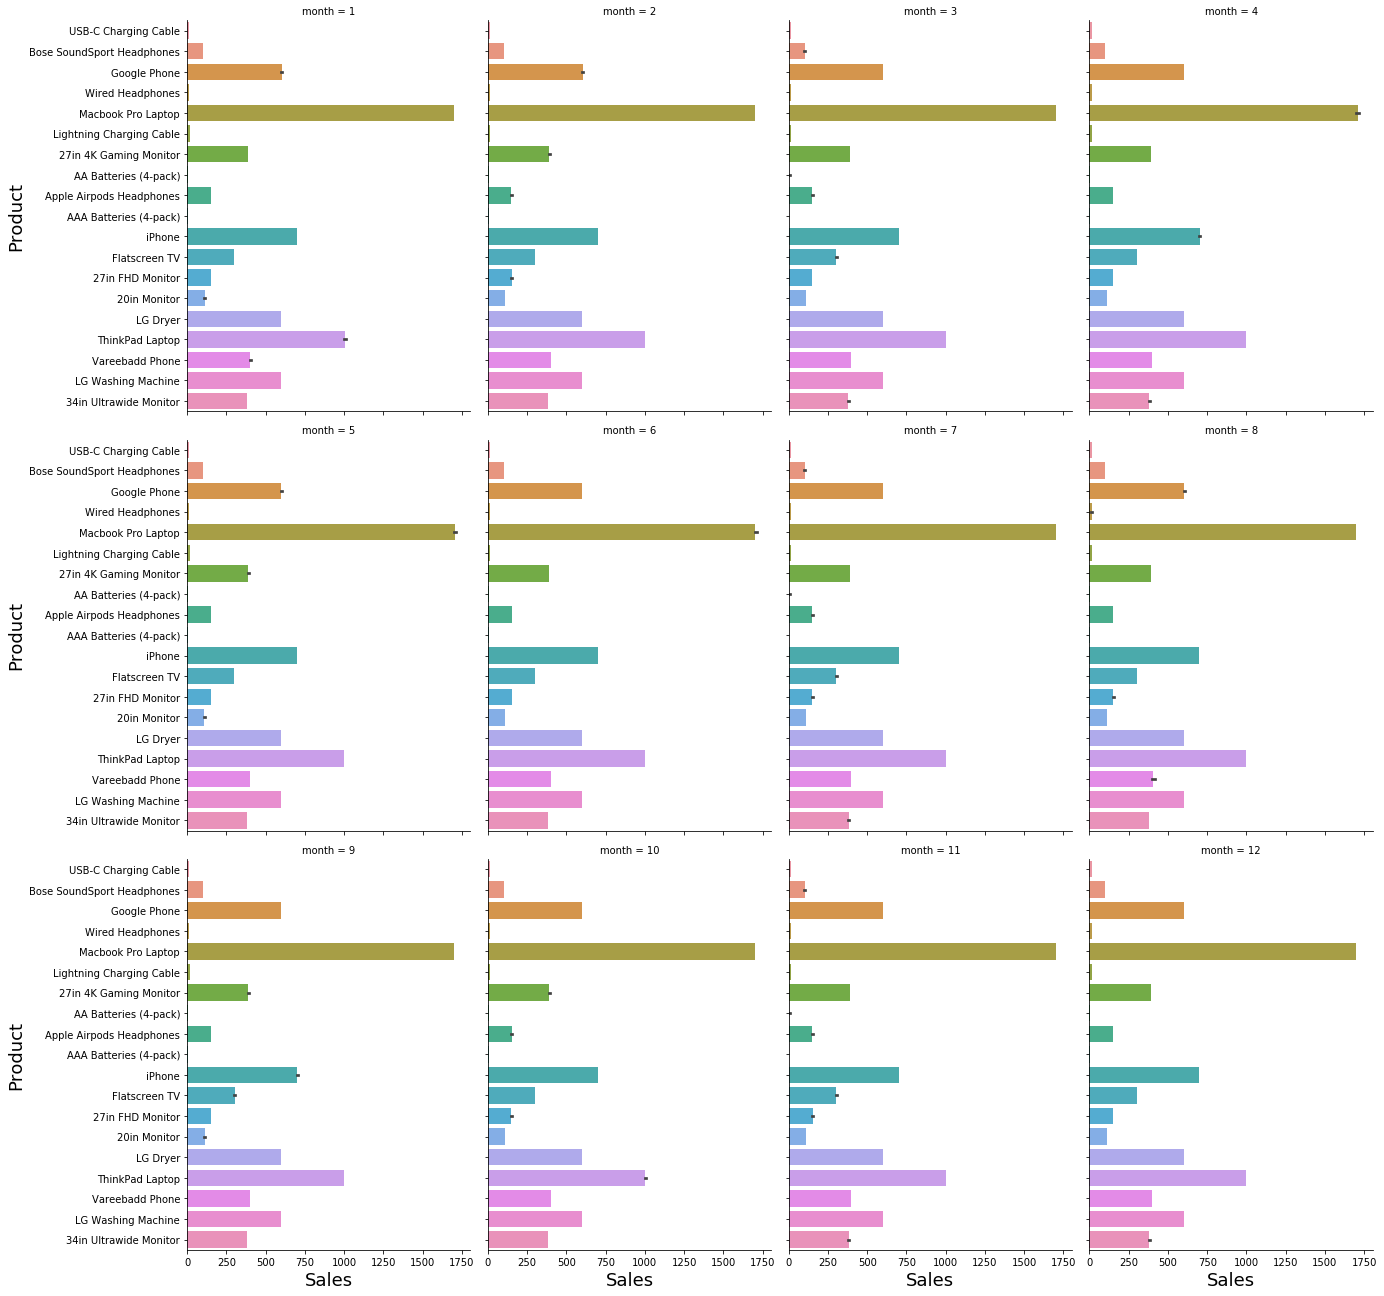

In [76]:
g = sns.catplot(x="Sales",y="Product",col="month", col_wrap=4,
                data=df,
                kind="bar", height=6, aspect=.8)
g.set_xlabels('Sales',fontsize=18)
g.set_ylabels('Product',fontsize=18)
plt.show()

## Which City has more Sales in which month?

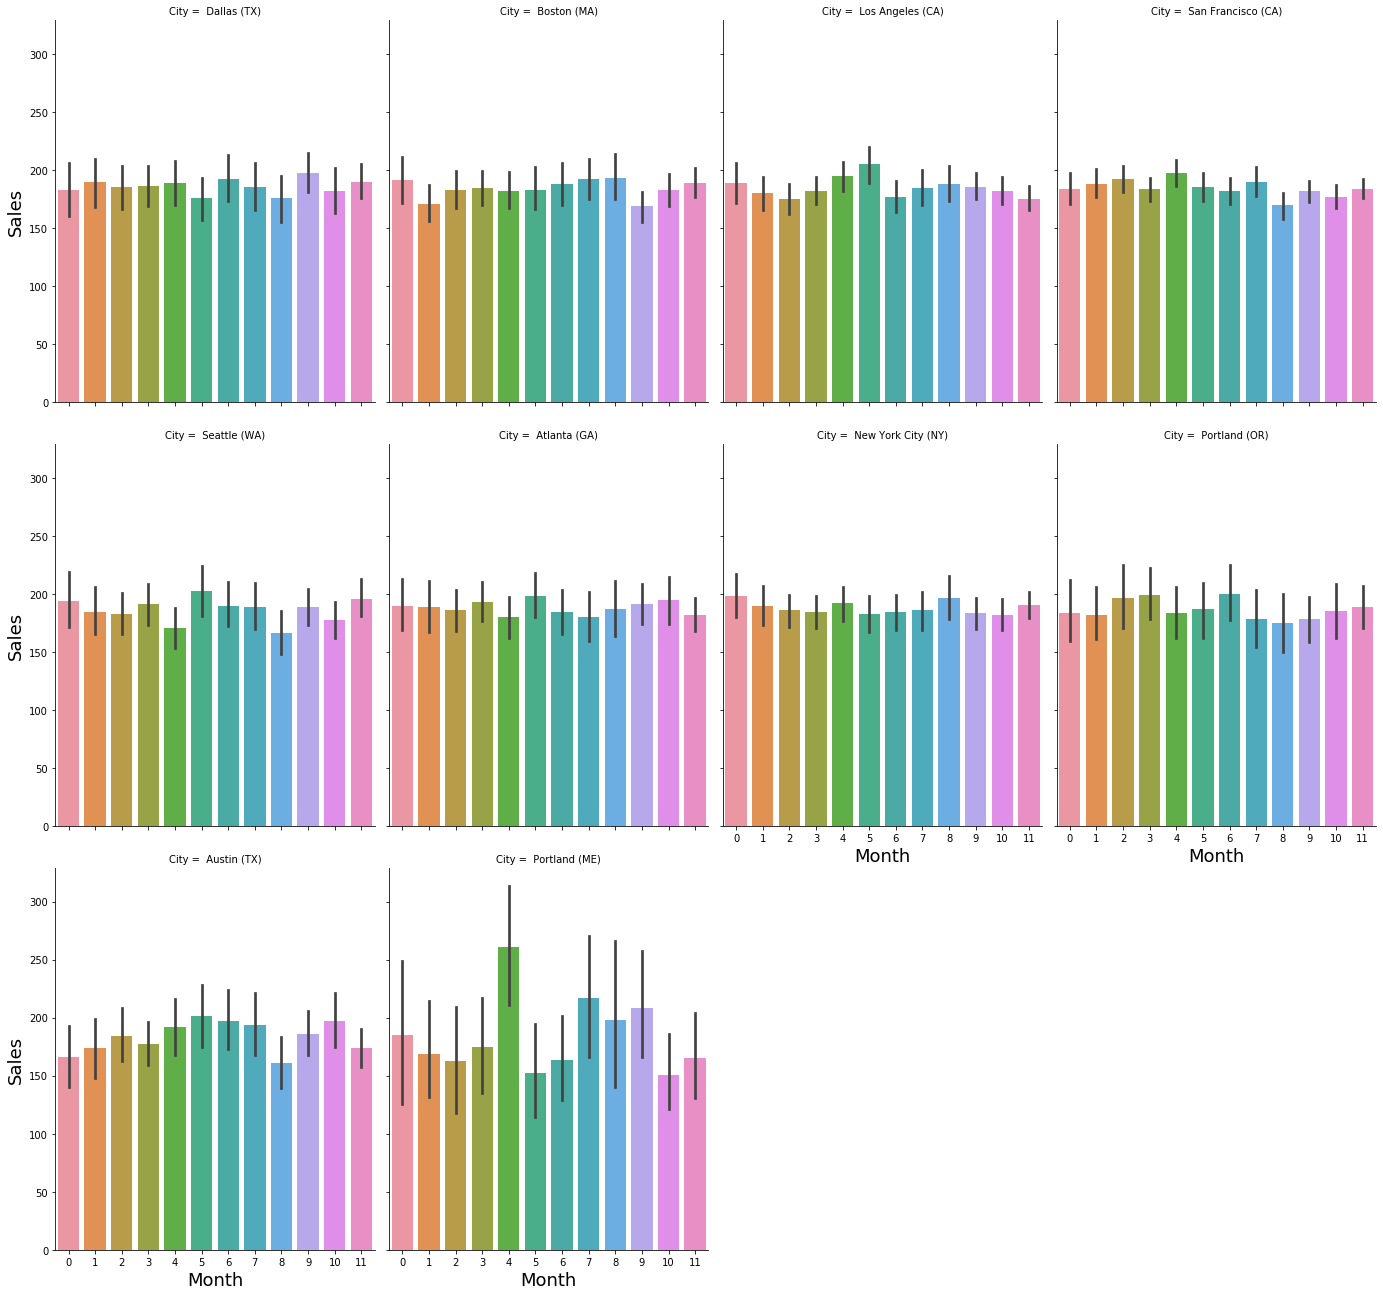

In [77]:
g = sns.catplot(y="Sales",x="month",col="City", col_wrap=4,
                data=df,
                kind="bar", height=6, aspect=.8)
g.set_xticklabels(labels=range(0,13))
g.set_xlabels('Month',fontsize=18)
g.set_ylabels('Sales',fontsize=18)
plt.show()